

##  **Drive connection**

In [ ]:
# !pip install -q kaggle

# from google.colab import files
# files.upload()  # seleziona kaggle.json

# !mkdir -p ~/.kaggle
# !mv kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# from google.colab import drive
# drive.mount("/gdrive")

# DATASET_DIR = "/gdrive/MyDrive/Artificial_Neural_Networks/Image_Classification_Challenge"

# import os
# os.makedirs(DATASET_DIR, exist_ok=True)

# competition = "an2dl2526c2"

# !kaggle competitions download -c {competition} -p /content/

# zip_path = f"/content/{competition}.zip"

# !unzip -q {zip_path} -d /content/{competition}/

# print("🔁 Copia del dataset su Google Drive (solo la prima volta)...")

# !cp -r /content/{competition}/* "{DATASET_DIR}/"

# print("Dataset copiato correttamente in Drive!")

# os.listdir(DATASET_DIR)


⬆️ Carica il file kaggle.json (scaricato dal tuo profilo Kaggle → Account → API)


Saving kaggle.json to kaggle.json
✅ Kaggle API configurata correttamente!
Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
📁 Drive montato correttamente.
📂 Cartella Dataset: /gdrive/MyDrive/Artificial_Neural_Networks/Image_Classification_Challenge
📥 Download del dataset in /content/ ...
100% 1.87G/1.88G [00:21<00:00, 251MB/s]
100% 1.88G/1.88G [00:21<00:00, 93.0MB/s]
📦 Estrazione del dataset...
✅ Estrazione completata!
🔁 Copia del dataset su Google Drive (solo la prima volta)...
🎉 Dataset copiato correttamente in Drive!
📁 Contenuto della cartella dataset:


['Second_Challenge.ipynb', 'test_data', 'train_data', 'train_labels.csv']

In [ ]:
from google.colab import drive
drive.mount("/gdrive")

DATASET_DIR = "/gdrive/MyDrive/Artificial_Neural_Networks/Images_Classification_Challenge/dataset"

TRAIN_IMG_DIR = f"{DATASET_DIR}/train_data"
TEST_IMG_DIR  = f"{DATASET_DIR}/test_data"
LABELS_CSV    = f"{DATASET_DIR}/train_labels.csv"

import os
print(os.listdir(DATASET_DIR))

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
['test_data', 'an2dl2526c2v2.zip', 'train_data', 'delete.txt', 'train_labels.csv']




##  **Plot dataset info**

<Axes: xlabel='label'>

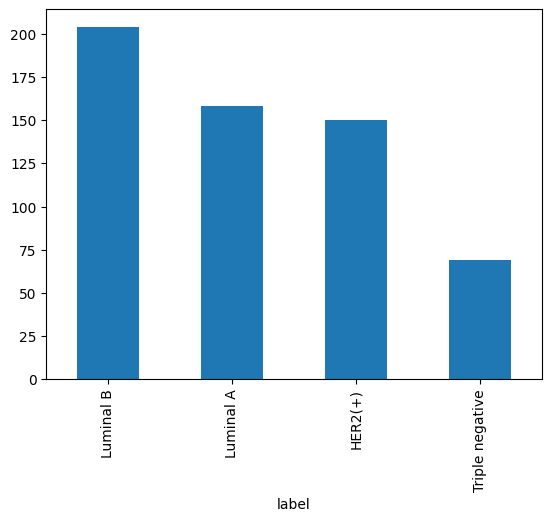

In [ ]:
import pandas as pd

df = pd.read_csv(LABELS_CSV)
df.head()
df['label'].value_counts().plot(kind='bar')


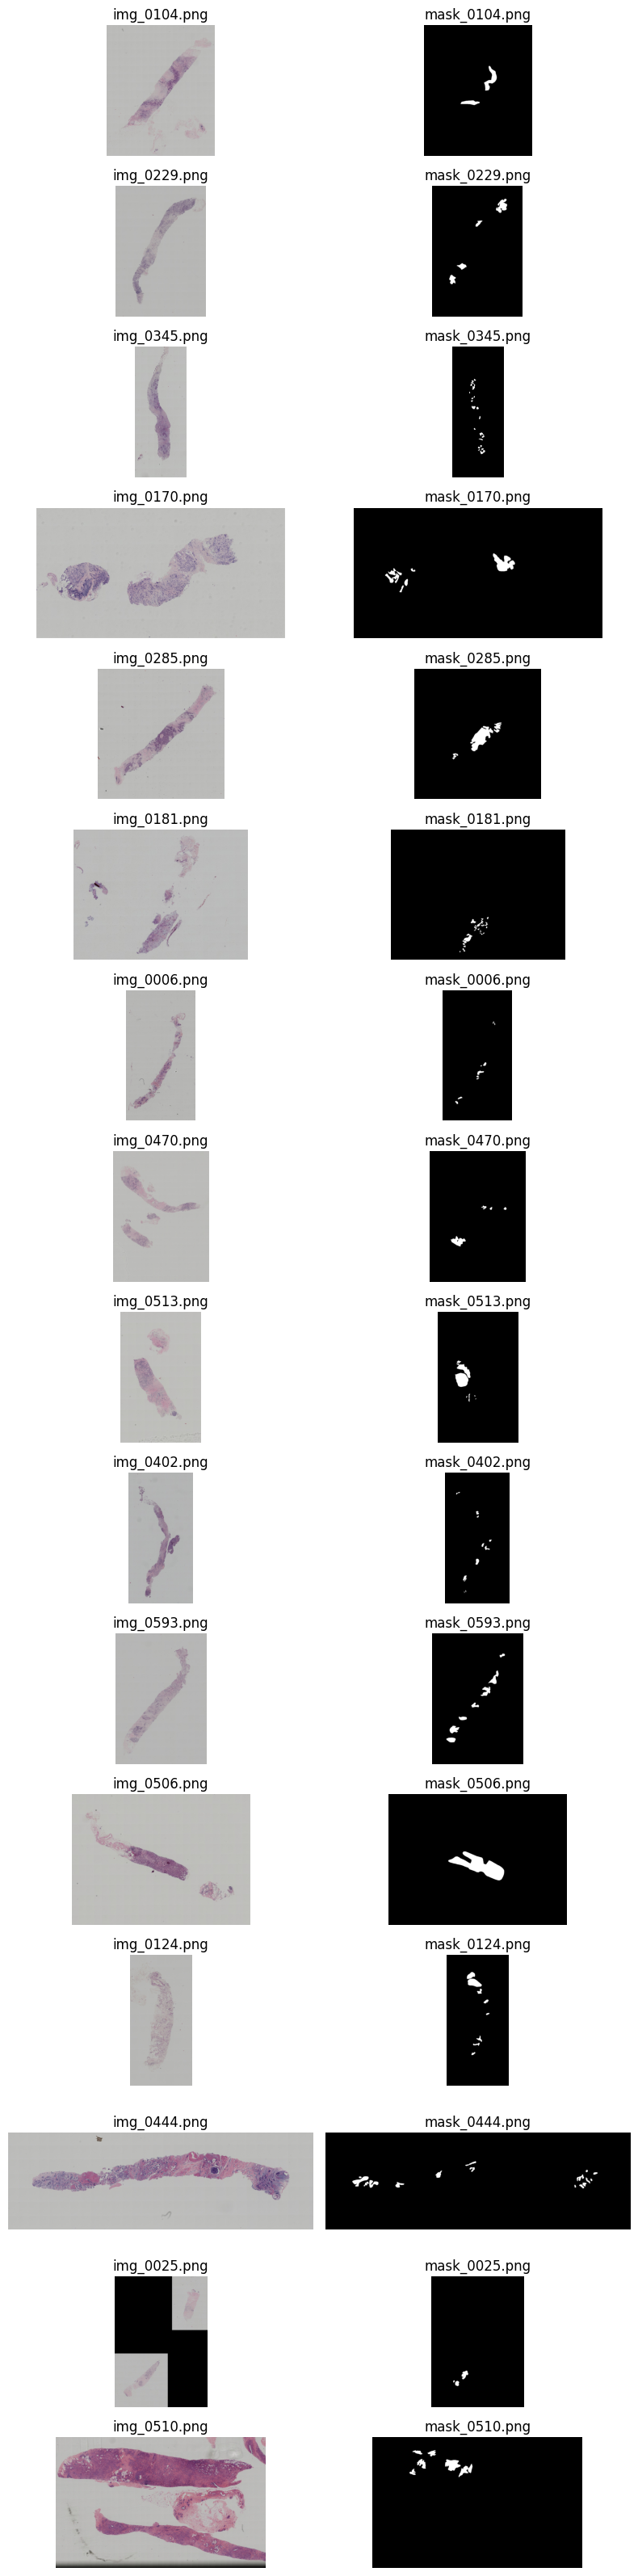

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def show_random_samples(img_dir, num_samples=16):
    # Prende tutti i file immagine nel formato img_xxxx.png
    img_files = sorted([f for f in os.listdir(img_dir) if f.startswith("img_") and f.endswith(".png")])

    # Seleziona N immagini casuali
    samples = random.sample(img_files, num_samples)

    # Prepara la griglia 4×4 (immagine + mask = 2 colonne)
    fig, axes = plt.subplots(num_samples, 2, figsize=(8, num_samples * 2))

    for i, img_name in enumerate(samples):
        img_path = os.path.join(img_dir, img_name)

        # Costruisce il nome della mask corrispondente
        mask_name = img_name.replace("img_", "mask_")
        mask_path = os.path.join(img_dir, mask_name)

        # Carica immagine e mask
        img = Image.open(img_path)
        mask = Image.open(mask_path)

        # Plot immagine
        axes[i, 0].imshow(img)
        axes[i, 0].set_title(img_name)
        axes[i, 0].axis("off")

        # Plot mask
        axes[i, 1].imshow(mask, cmap="gray")
        axes[i, 1].set_title(mask_name)
        axes[i, 1].axis("off")

    plt.tight_layout()
    plt.show()


show_random_samples(TRAIN_IMG_DIR, num_samples=16)


In [ ]:
import os
from collections import Counter
from PIL import Image

def analyze_image_sizes(img_dir, top_k=10, outlier_threshold=3):
    """
    Analizza le dimensioni (width, height) delle immagini nel dataset.

    Parametri:
        img_dir: cartella contenente img_xxxx.png
        top_k: numero di dimensioni più comuni da mostrare
        outlier_threshold: mostra come outlier tutte le dimensioni che compaiono <= questa soglia
    """

    sizes = []

    # Raccoglie tutte le dimensioni
    for fname in os.listdir(img_dir):
        if fname.startswith("img_") and fname.endswith(".png"):
            path = os.path.join(img_dir, fname)
            try:
                with Image.open(path) as img:
                    sizes.append(img.size)  # (width, height)
            except:
                print(f"⚠️ Problema con il file: {fname}")

    # Conta le frequenze
    size_counts = Counter(sizes)

    print("\n📊 **Distribuzione delle dimensioni (width × height)**")
    print("--------------------------------------------------")

    # Stampa le dimensioni più frequenti
    for (w, h), count in size_counts.most_common(top_k):
        print(f" - {w}×{h}: {count} immagini")

    # Trova outlier
    outliers = [(s, c) for s, c in size_counts.items() if c <= outlier_threshold]

    print("\n⚠️ **Dimensioni OUTLIER (comparse <= {outlier_threshold} volte)**")
    print("--------------------------------------------------")
    if outliers:
        for (w, h), count in sorted(outliers, key=lambda x: x[1]):
            print(f" - {w}×{h}: {count} immagine/i")
    else:
        print(" Nessuna dimensione outlier rilevata.")

    print("\n📦 Totale immagini analizzate:", len(sizes))
    print("📐 Dimensioni uniche trovate:", len(size_counts))


analyze_image_sizes(TRAIN_IMG_DIR, top_k=10, outlier_threshold=3)



📊 **Distribuzione delle dimensioni (width × height)**
--------------------------------------------------
 - 1024×1392: 5 immagini
 - 1134×1024: 4 immagini
 - 1024×1057: 4 immagini
 - 1024×1026: 4 immagini
 - 1024×1568: 4 immagini
 - 1024×1100: 3 immagini
 - 1024×1395: 3 immagini
 - 1514×1024: 3 immagini
 - 1162×1024: 3 immagini
 - 1259×1024: 3 immagini

⚠️ **Dimensioni OUTLIER (comparse <= {outlier_threshold} volte)**
--------------------------------------------------
 - 1024×1458: 1 immagine/i
 - 1024×2313: 1 immagine/i
 - 1024×1253: 1 immagine/i
 - 1404×1024: 1 immagine/i
 - 1024×2343: 1 immagine/i
 - 1024×1078: 1 immagine/i
 - 1095×1024: 1 immagine/i
 - 1024×1212: 1 immagine/i
 - 1073×1024: 1 immagine/i
 - 1024×1186: 1 immagine/i
 - 1196×1024: 1 immagine/i
 - 1024×1246: 1 immagine/i
 - 1768×1024: 1 immagine/i
 - 1024×1865: 1 immagine/i
 - 1024×1394: 1 immagine/i
 - 2074×1024: 1 immagine/i
 - 1188×1024: 1 immagine/i
 - 1024×1095: 1 immagine/i
 - 1127×1024: 1 immagine/i
 - 1024×2496:



##  **Img statistics**

Pixel totali nella maschera: 6490


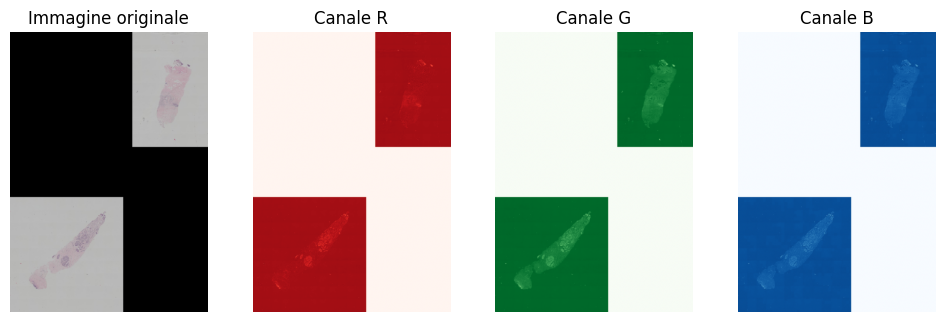

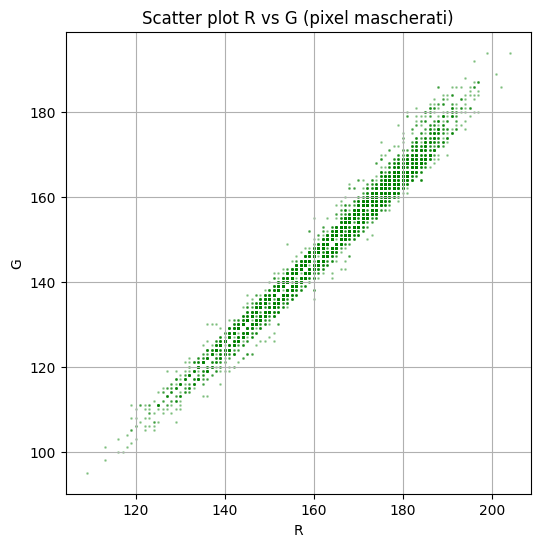

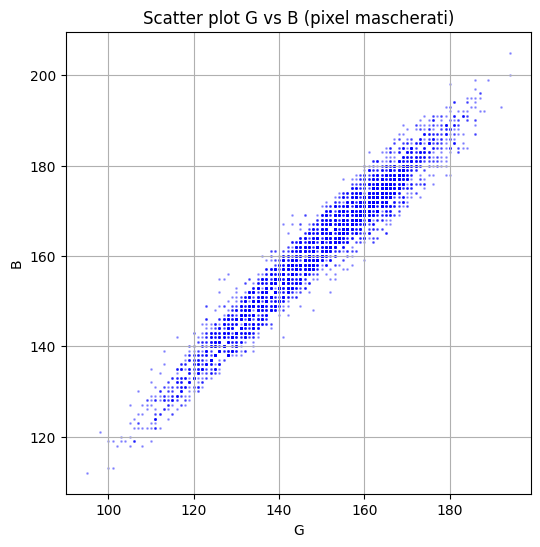

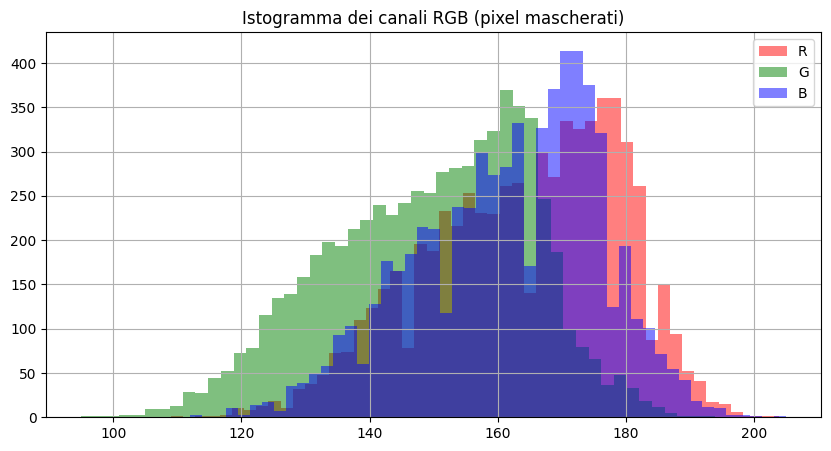

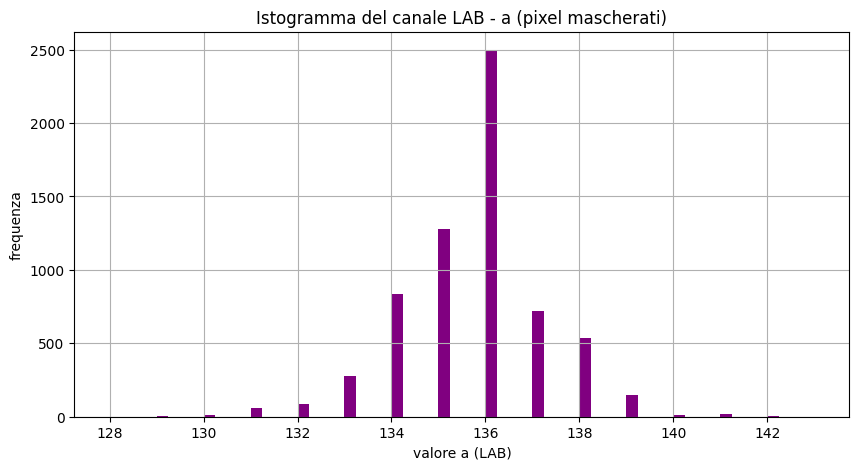

Statistiche canale LAB 'a'
  min: 128
  max: 143
  mean: 135.67873651771956
  percentili 1%-99%: [131. 139.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os

# ---------------------------
# CONFIGURAZIONE
# ---------------------------
IMG_NAME = "img_0025.png"  # REFERENCE ISTOLOGICAL img
IMG_PATH = os.path.join(TRAIN_IMG_DIR, IMG_NAME)
MASK_PATH = IMG_PATH.replace("img_", "mask_")

# ---------------------------
# CARICAMENTO IMMAGINE + MASCHERA
# ---------------------------
img  = Image.open(IMG_PATH).convert("RGB")
mask = Image.open(MASK_PATH).convert("L")

img_arr  = np.array(img)
mask_arr = np.array(mask) > 0



# ---------------------------
# ESTRAZIONE CANALI RGB
# ---------------------------
R = img_arr[:,:,0]
G = img_arr[:,:,1]
B = img_arr[:,:,2]

R_vals = R[mask_arr]
G_vals = G[mask_arr]
B_vals = B[mask_arr]

print("Pixel totali nella maschera:", len(R_vals))

# ---------------------------------------------------------
# 0) VISUALIZZA IMMAGINE E 3 CANALI
# ---------------------------------------------------------

plt.figure(figsize=(12,8))

# Immagine originale
plt.subplot(2,4,1)
plt.imshow(img_arr)
plt.title("Immagine originale")
plt.axis("off")

# R channel
plt.subplot(2,4,2)
plt.imshow(R, cmap="Reds")
plt.title("Canale R")
plt.axis("off")

# G channel
plt.subplot(2,4,3)
plt.imshow(G, cmap="Greens")
plt.title("Canale G")
plt.axis("off")

# B channel
plt.subplot(2,4,4)
plt.imshow(B, cmap="Blues")
plt.title("Canale B")
plt.axis("off")

# ---------------------------------------------------------
# 1) SCATTER R VS G
# ---------------------------------------------------------
plt.figure(figsize=(6,6))
plt.scatter(R_vals, G_vals, s=1, alpha=0.3, color="green")
plt.xlabel("R")
plt.ylabel("G")
plt.title("Scatter plot R vs G (pixel mascherati)")
plt.grid(True)
plt.show()

# ---------------------------------------------------------
# 2) SCATTER G VS B
# ---------------------------------------------------------
plt.figure(figsize=(6,6))
plt.scatter(G_vals, B_vals, s=1, alpha=0.3, color="blue")
plt.xlabel("G")
plt.ylabel("B")
plt.title("Scatter plot G vs B (pixel mascherati)")
plt.grid(True)
plt.show()

# ---------------------------------------------------------
# 3) ISTOGRAMMI RGB
# ---------------------------------------------------------
plt.figure(figsize=(10,5))
plt.hist(R_vals, bins=50, alpha=0.5, label="R", color="red")
plt.hist(G_vals, bins=50, alpha=0.5, label="G", color="green")
plt.hist(B_vals, bins=50, alpha=0.5, label="B", color="blue")
plt.title("Istogramma dei canali RGB (pixel mascherati)")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------------------------
# 4) ISTOGRAMMA DEL CANALE LAB 'a'
# ---------------------------------------------------------
lab = cv2.cvtColor(img_arr, cv2.COLOR_RGB2LAB)
L, A, B2 = lab[:,:,0], lab[:,:,1], lab[:,:,2]

A_vals = A[mask_arr]

plt.figure(figsize=(10,5))
plt.hist(A_vals, bins=60, color="purple")
plt.title("Istogramma del canale LAB - a (pixel mascherati)")
plt.xlabel("valore a (LAB)")
plt.ylabel("frequenza")
plt.grid(True)
plt.show()

print("Statistiche canale LAB 'a'")
print("  min:", np.min(A_vals))
print("  max:", np.max(A_vals))
print("  mean:", np.mean(A_vals))
print("  percentili 1%-99%:", np.percentile(A_vals, [1,99]))


Pixel totali nella maschera: 12451


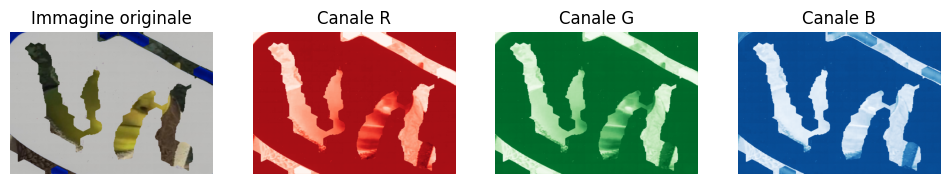

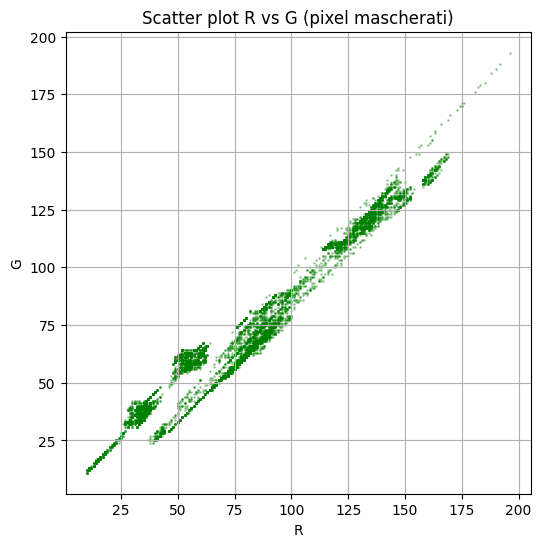

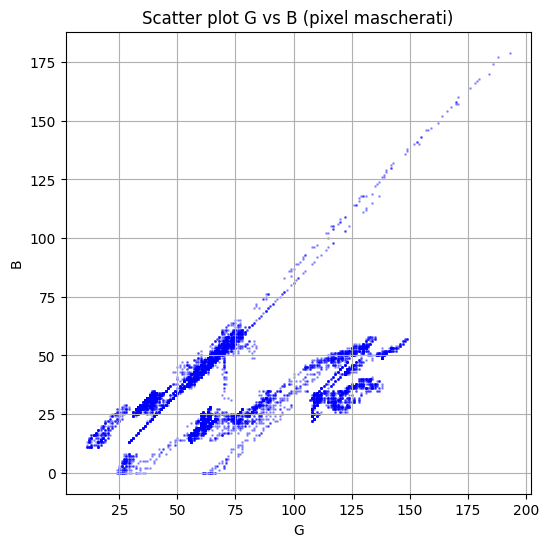

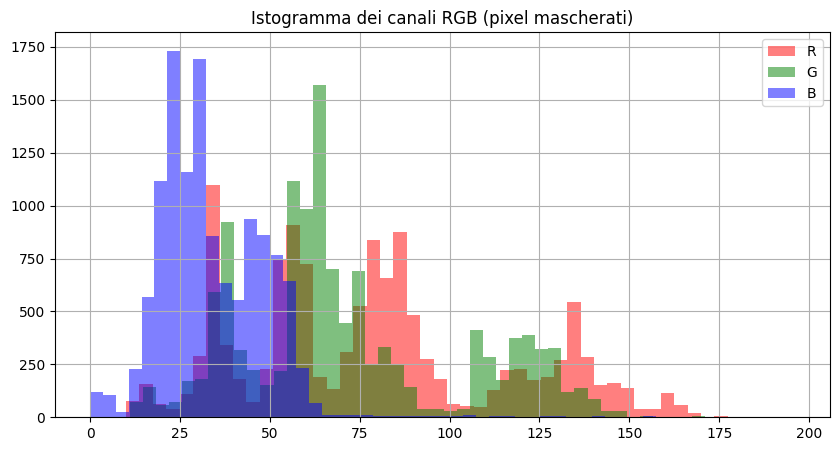

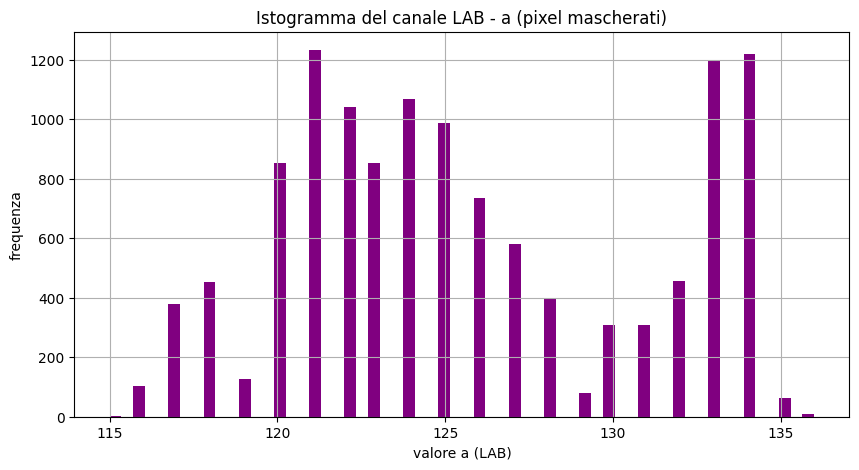

Statistiche canale LAB 'a'
  min: 115
  max: 136
  mean: 125.66589028993656
  percentili 1%-99%: [117. 134.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os

# ---------------------------
# CONFIGURAZIONE
# ---------------------------
IMG_NAME = "img_0022.png"  # <-- SHREK
IMG_PATH = os.path.join(TRAIN_IMG_DIR, IMG_NAME)
MASK_PATH = IMG_PATH.replace("img_", "mask_")

# ---------------------------
# CARICAMENTO IMMAGINE + MASCHERA
# ---------------------------
img  = Image.open(IMG_PATH).convert("RGB")
mask = Image.open(MASK_PATH).convert("L")

img_arr  = np.array(img)
mask_arr = np.array(mask) > 0



# ---------------------------
# ESTRAZIONE CANALI RGB
# ---------------------------
R = img_arr[:,:,0]
G = img_arr[:,:,1]
B = img_arr[:,:,2]

R_vals = R[mask_arr]
G_vals = G[mask_arr]
B_vals = B[mask_arr]

print("Pixel totali nella maschera:", len(R_vals))

# ---------------------------------------------------------
# 0) VISUALIZZA IMMAGINE E 3 CANALI
# ---------------------------------------------------------

plt.figure(figsize=(12,8))

# Immagine originale
plt.subplot(2,4,1)
plt.imshow(img_arr)
plt.title("Immagine originale")
plt.axis("off")

# R channel
plt.subplot(2,4,2)
plt.imshow(R, cmap="Reds")
plt.title("Canale R")
plt.axis("off")

# G channel
plt.subplot(2,4,3)
plt.imshow(G, cmap="Greens")
plt.title("Canale G")
plt.axis("off")

# B channel
plt.subplot(2,4,4)
plt.imshow(B, cmap="Blues")
plt.title("Canale B")
plt.axis("off")

# ---------------------------------------------------------
# 1) SCATTER R VS G
# ---------------------------------------------------------
plt.figure(figsize=(6,6))
plt.scatter(R_vals, G_vals, s=1, alpha=0.3, color="green")
plt.xlabel("R")
plt.ylabel("G")
plt.title("Scatter plot R vs G (pixel mascherati)")
plt.grid(True)
plt.show()

# ---------------------------------------------------------
# 2) SCATTER G VS B
# ---------------------------------------------------------
plt.figure(figsize=(6,6))
plt.scatter(G_vals, B_vals, s=1, alpha=0.3, color="blue")
plt.xlabel("G")
plt.ylabel("B")
plt.title("Scatter plot G vs B (pixel mascherati)")
plt.grid(True)
plt.show()

# ---------------------------------------------------------
# 3) ISTOGRAMMI RGB
# ---------------------------------------------------------
plt.figure(figsize=(10,5))
plt.hist(R_vals, bins=50, alpha=0.5, label="R", color="red")
plt.hist(G_vals, bins=50, alpha=0.5, label="G", color="green")
plt.hist(B_vals, bins=50, alpha=0.5, label="B", color="blue")
plt.title("Istogramma dei canali RGB (pixel mascherati)")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------------------------
# 4) ISTOGRAMMA DEL CANALE LAB 'a'
# ---------------------------------------------------------
lab = cv2.cvtColor(img_arr, cv2.COLOR_RGB2LAB)
L, A, B2 = lab[:,:,0], lab[:,:,1], lab[:,:,2]

A_vals = A[mask_arr]

plt.figure(figsize=(10,5))
plt.hist(A_vals, bins=60, color="purple")
plt.title("Istogramma del canale LAB - a (pixel mascherati)")
plt.xlabel("valore a (LAB)")
plt.ylabel("frequenza")
plt.grid(True)
plt.show()

print("Statistiche canale LAB 'a'")
print("  min:", np.min(A_vals))
print("  max:", np.max(A_vals))
print("  mean:", np.mean(A_vals))
print("  percentili 1%-99%:", np.percentile(A_vals, [1,99]))




##  **Detect wrong img**

In [ ]:
def show_contaminated(samples, base_path, n=20):
    if len(samples) == 0:
        print("Nessuna immagine contaminata trovata.")
        return

    plt.figure(figsize=(40,20))

    for i, (fname) in enumerate(samples[:n]):
        img = Image.open(os.path.join(base_path, fname))

        plt.subplot(2, (n+1)//2, i+1)
        plt.imshow(img)
        plt.title(f"{fname}\n")
        plt.axis("off")

    plt.suptitle("Immagini contaminate rilevate dal filtro LAB")
    plt.show()



In [ ]:
import numpy as np
from PIL import Image

def is_shrek_blue_distribution(img,
                               blue_max=30,
                               ratio_thresh=0.20,
                               count_thresh=3000):
    """
    Rileva immagini 'tipo Shrek' analizzando solo la distribuzione del canale Blue.

    Parametri:
    - blue_max:     valore massimo per considerare un pixel 'blue basso'
    - ratio_thresh: soglia minima della percentuale di pixel B<blue_max
    - count_thresh: soglia minima assoluta sul numero totale di pixel B<blue_max

    Ritorna:
    True  → immagine da scartare (probabile Shrek)
    False → immagine normale
    """
    # converti immagine in numpy
    arr = np.array(img)

    # canale blu
    B = arr[:, :, 2]

    # pixel B molto bassi
    blue_low_mask = (B <= blue_max)
    count_blue_low = blue_low_mask.sum()

    # rapporto sul totale
    total_pixels = B.size
    ratio = count_blue_low / total_pixels

    # criterio combinato (evita falsi positivi su immagini piccole)
    if ratio > ratio_thresh and count_blue_low > count_thresh:
        return True   # probabile Shrek
    else:
        return False


In [ ]:
import os
from PIL import Image

shrek_imgs = []
clean_imgs = []

for fname in os.listdir(TRAIN_IMG_DIR):
    if not fname.startswith("img_"):
        continue

    path = os.path.join(TRAIN_IMG_DIR, fname) # train
    img = Image.open(path).convert("RGB")

    if is_shrek_blue_distribution(img):
        shrek_imgs.append(fname)
    else:
        clean_imgs.append(fname)

print("Shrek rilevate:", len(shrek_imgs))
print("Pulite:", len(clean_imgs))


Shrek rilevate: 5
Pulite: 636


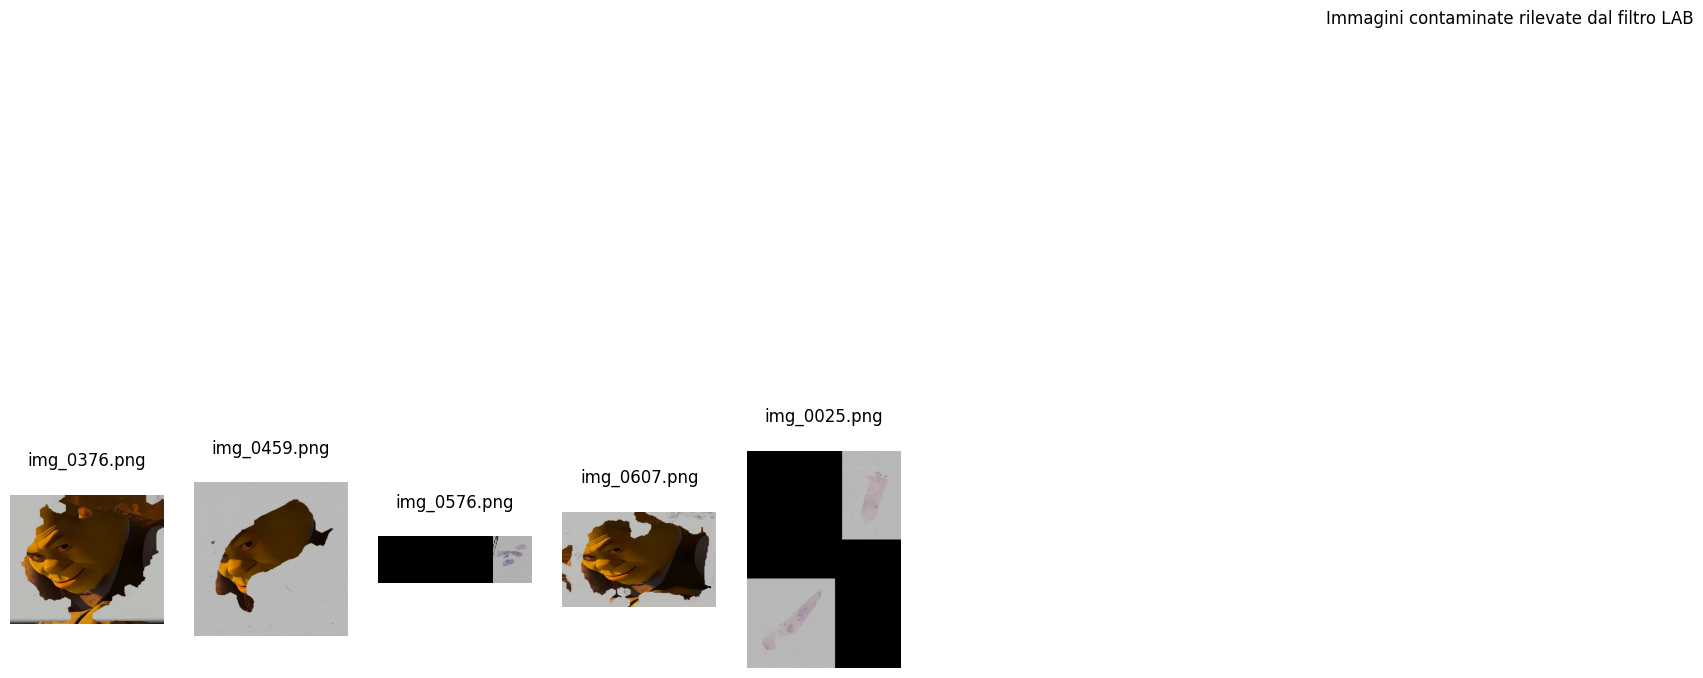

In [ ]:
show_contaminated(shrek_imgs, TRAIN_IMG_DIR, n=33) # plot shrek img

In [ ]:
def is_green_artifact_lab(img, a_thresh=100, ratio_thresh=0.01):
    """
    Identifica artefatti verdi nelle immagini H&E usando il canale 'a' di LAB.
    """
    img_arr = np.array(img)
    lab = cv2.cvtColor(img_arr, cv2.COLOR_RGB2LAB)
    A = lab[:,:,1]  # canale 'a': rosso <-> verde

    green_pixels = (A < a_thresh)
    ratio = green_pixels.mean()

    return ratio > ratio_thresh


In [ ]:
IMG_NAME = "img_0152.png"  # <-- cambia tu
IMG_PATH = os.path.join(TRAIN_IMG_DIR, IMG_NAME)
img  = Image.open(IMG_PATH).convert("RGB")
if is_green_artifact_lab(img):
    print("Artefatto verde trovato!")
else:
    print("Nessun artefatto verde trovato.")

Artefatto verde trovato!


In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

contaminated = []
clean = []

for fname in os.listdir(TRAIN_IMG_DIR): # train
    if not fname.startswith("img_"):
        continue
    path = os.path.join(TRAIN_IMG_DIR, fname) # train

    img = Image.open(path).convert("RGB")
    is_cont = is_green_artifact_lab(img)

    if is_cont:
        contaminated.append(fname)
    else:
        clean.append(fname)

print("Totale immagini analizzate :", len(clean) + len(contaminated))
print("Immagini contaminate       :", len(contaminated))
print("Immagini pulite            :", len(clean))

# Ordina per gravità contaminazione
contaminated_sorted = sorted(contaminated, key=lambda x: x[1], reverse=True)


Totale immagini analizzate : 954
Immagini contaminate       : 2
Immagini pulite            : 952


In [ ]:
show_contaminated(contaminated_sorted, TRAIN_IMG_DIR, n=6) # plot green artifact



##  **Mask preprocess**

In [ ]:
# ============================================================
# CLEAN MASK  (closing + dilation)
# ============================================================

def clean_mask(mask_arr, close_size=15, dilate_size=15):
    """
    Cleans mask using morphological closing + dilation to improve
    tumor contiguity and increase usable mask area.
    """
    kernel_close  = np.ones((close_size, close_size), np.uint8)
    kernel_dilate = np.ones((dilate_size, dilate_size), np.uint8)

    # Closing: fill small gaps
    mask_closed = cv2.morphologyEx(mask_arr, cv2.MORPH_CLOSE, kernel_close)

    # Dilation: expand tumor regions slightly
    mask_dilated = cv2.dilate(mask_closed, kernel_dilate, iterations=1)

    return mask_dilated

In [ ]:
# ============================================================
# TILE EXTRACTION VIA CENTROIDS
# ============================================================

def extract_tiles_from_centroids(img, mask, tile_size=224, min_mask_ratio=0.05):
    """
    Extract tiles centered on connected components' centroids.
    Much higher tile quality than sliding window.
    """
    img_arr  = np.array(img)
    mask_arr = np.array(mask)

    # Clean mask first
    mask_clean = clean_mask(mask_arr)

    # Find connected components
    num_labels, labels = cv2.connectedComponents((mask_clean > 0).astype(np.uint8))

    H, W = img_arr.shape[:2]
    tiles = []

    half = tile_size // 2

    for lbl in range(1, num_labels):  # skip background
        ys, xs = np.where(labels == lbl)
        if len(xs) == 0:
            continue

        # centroid
        cx, cy = int(xs.mean()), int(ys.mean())

        # region bounds
        x1, x2 = cx - half, cx + half
        y1, y2 = cy - half, cy + half

        # padding if needed
        pad_left   = max(0, -x1)
        pad_top    = max(0, -y1)
        pad_right  = max(0, x2 - W)
        pad_bottom = max(0, y2 - H)

        tile_img = img_arr[max(y1,0):min(y2,H), max(x1,0):min(x2,W)]
        tile_mask = mask_clean[max(y1,0):min(y2,H), max(x1,0):min(x2,W)]

        if pad_left or pad_top or pad_right or pad_bottom:
            tile_img = cv2.copyMakeBorder(tile_img, pad_top, pad_bottom, pad_left, pad_right, cv2.BORDER_CONSTANT, value=0)
            tile_mask = cv2.copyMakeBorder(tile_mask, pad_top, pad_bottom, pad_left, pad_right, cv2.BORDER_CONSTANT, value=0)

        # reject tile if too little tumor
        if (tile_mask > 0).mean() < min_mask_ratio:
            continue

        tiles.append((Image.fromarray(tile_img), tile_mask))

    return tiles

In [ ]:
# ============================================================
# MULTISCALE TILE EXTRACTION VIA CENTROIDS
# ============================================================

def extract_centered_crop(img_arr, cx, cy, crop_size):
    """
    Extract a square crop centered at (cx, cy) with padding if needed.
    """
    H, W = img_arr.shape[:2]
    half = crop_size // 2

    x1, x2 = cx - half, cx + half
    y1, y2 = cy - half, cy + half

    pad_left   = max(0, -x1)
    pad_top    = max(0, -y1)
    pad_right  = max(0, x2 - W)
    pad_bottom = max(0, y2 - H)

    crop = img_arr[max(y1, 0):min(y2, H),
                   max(x1, 0):min(x2, W)]

    if pad_left or pad_top or pad_right or pad_bottom:
        crop = cv2.copyMakeBorder(
            crop,
            pad_top, pad_bottom, pad_left, pad_right,
            cv2.BORDER_CONSTANT,
            value=0
        )

    return crop

def extract_multiscale_tiles_from_centroids(
    img,
    mask,
    tile_size=224,
    min_mask_ratio=0.02,
    zoom_factors=(0.58, 1.0, 1.5)  # zoom-in, base, zoom-out
):
    """
    Extract multiscale tiles (zoom-in / base / zoom-out) centered on tumor regions.
    All outputs are resized to tile_size x tile_size.
    """
    img_arr  = np.array(img)
    mask_arr = np.array(mask)

    mask_clean = clean_mask(mask_arr)
    num_labels, labels = cv2.connectedComponents((mask_clean > 0).astype(np.uint8))

    H, W = img_arr.shape[:2]
    tiles = []

    for lbl in range(1, num_labels):
        ys, xs = np.where(labels == lbl)
        if len(xs) == 0:
            continue

        cx, cy = int(xs.mean()), int(ys.mean())

        for zf in zoom_factors:
            crop_size = int(tile_size * zf)

            # extract image + mask crop
            crop_img  = extract_centered_crop(img_arr,  cx, cy, crop_size)
            crop_mask = extract_centered_crop(mask_clean, cx, cy, crop_size)

            # resize to 224x224
            crop_img  = cv2.resize(crop_img,  (tile_size, tile_size), interpolation=cv2.INTER_LINEAR)
            crop_mask = cv2.resize(crop_mask, (tile_size, tile_size), interpolation=cv2.INTER_NEAREST)

            # tumor content check (on resized mask)
            if (crop_mask > 0).mean() < min_mask_ratio:
                continue

            tiles.append((Image.fromarray(crop_img), crop_mask))

    return tiles

In [ ]:
# ============================================================
# TEST FUNCTIONS
# ============================================================

def test_on_single_image(img_path, mask_path, tile_size=224):
    """
    Loads img + mask, shows cleaned mask, extracts centroid tiles,
    and saves results for manual inspection.
    """
    print(f"\n=== Testing on {img_path} ===")

    # Load
    img  = Image.open(img_path).convert("RGB")
    mask = Image.open(mask_path).convert("L")
    mask_arr = np.array(mask)

    # Clean mask
    mask_clean = clean_mask(mask_arr)

    # Show mask before/after
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.title("Original Mask")
    plt.imshow(mask_arr, cmap="gray")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title("Cleaned Mask")
    plt.imshow(mask_clean, cmap="gray")
    plt.axis("off")

    plt.show()

    # Extract centroid-centered tiles
    tiles = extract_multiscale_tiles_from_centroids(img, mask, tile_size=tile_size)

    print(f"Extracted {len(tiles)} centroid tiles.")

    # Show first few tiles
    for i, (tile_img, tile_mask) in enumerate(tiles[:4]):
        plt.figure(figsize=(8,4))

        plt.subplot(1,2,1)
        plt.title(f"Tile {i} (image)")
        plt.imshow(tile_img)
        plt.axis("off")

        plt.subplot(1,2,2)
        plt.title(f"Tile {i} (mask)")
        plt.imshow(tile_mask, cmap="gray")
        plt.axis("off")

        plt.show()

        # Save tiles to disk
        tile_img.save(f"tile_test_{i}.png")
        cv2.imwrite(f"tile_test_mask_{i}.png", tile_mask)

    return tiles

Skipping img_0175.png because mask or image missing.

=== Testing on /gdrive/MyDrive/Artificial_Neural_Networks/Images_Classification_Challenge/dataset/train_data/img_0233.png ===


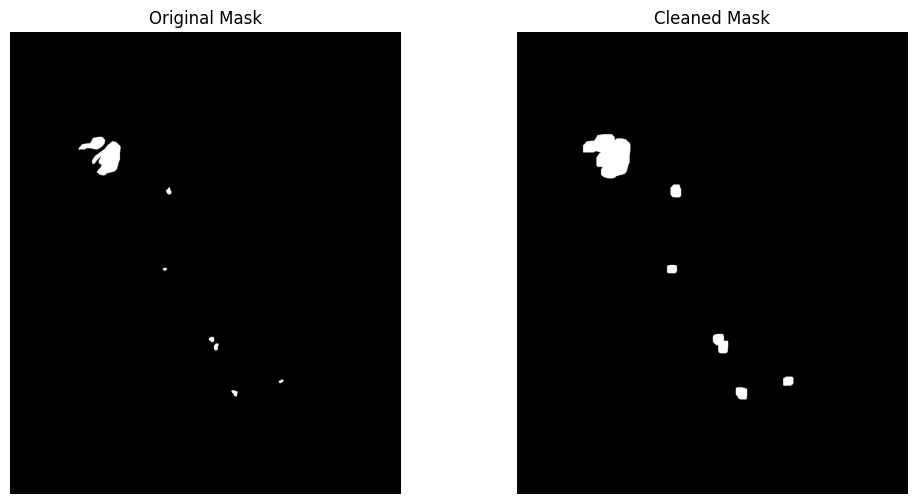

Extracted 13 centroid tiles.


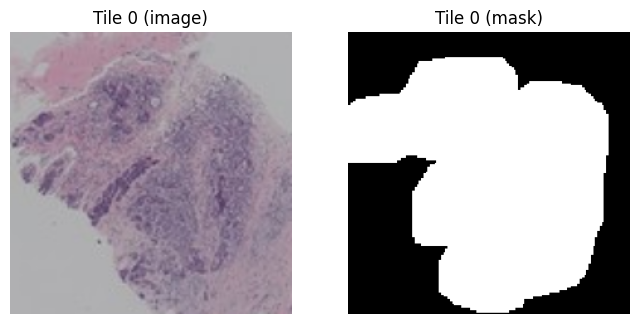

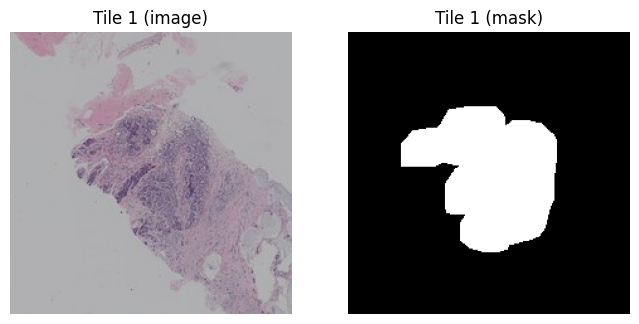

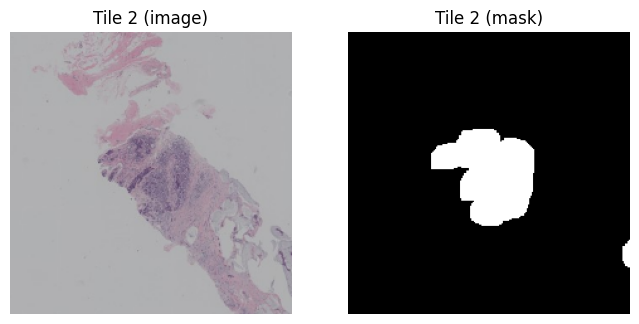

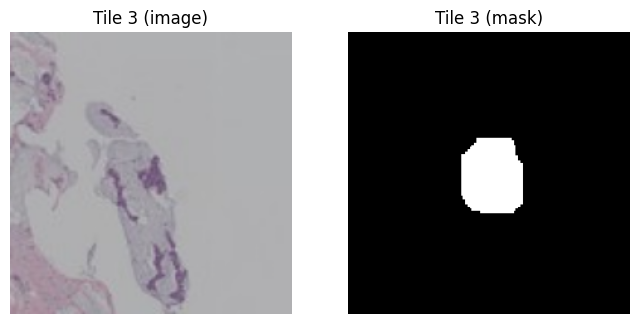


=== Testing on /gdrive/MyDrive/Artificial_Neural_Networks/Images_Classification_Challenge/dataset/train_data/img_0334.png ===


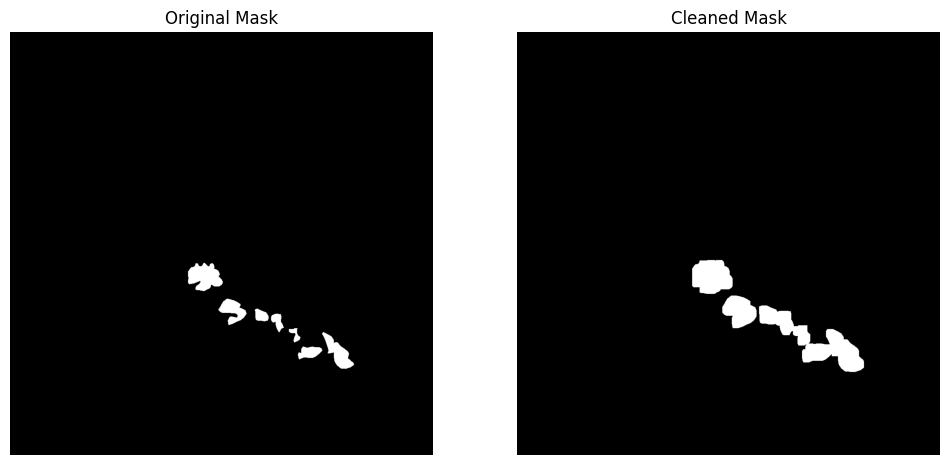

Extracted 9 centroid tiles.


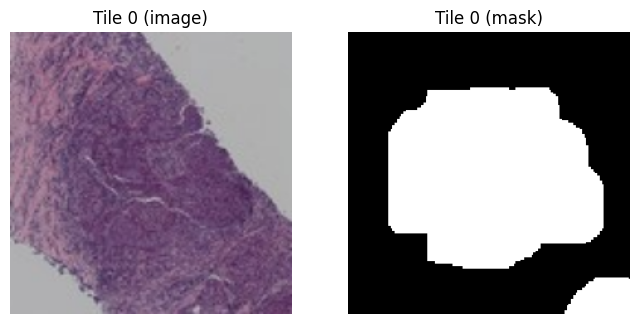

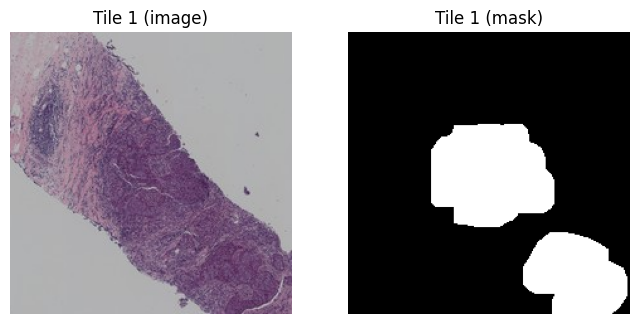

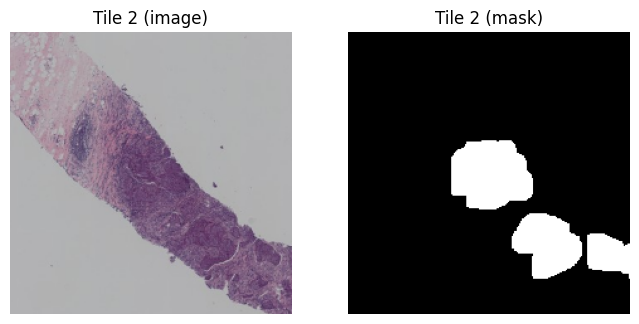

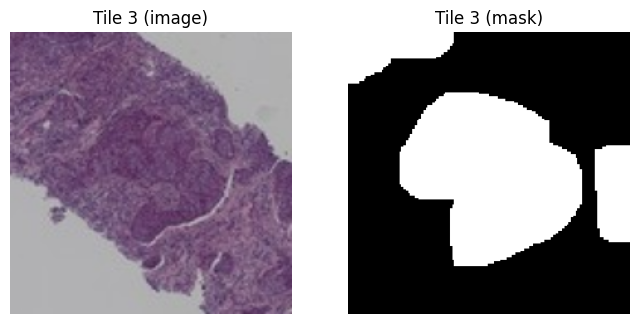


=== Testing on /gdrive/MyDrive/Artificial_Neural_Networks/Images_Classification_Challenge/dataset/train_data/img_0385.png ===


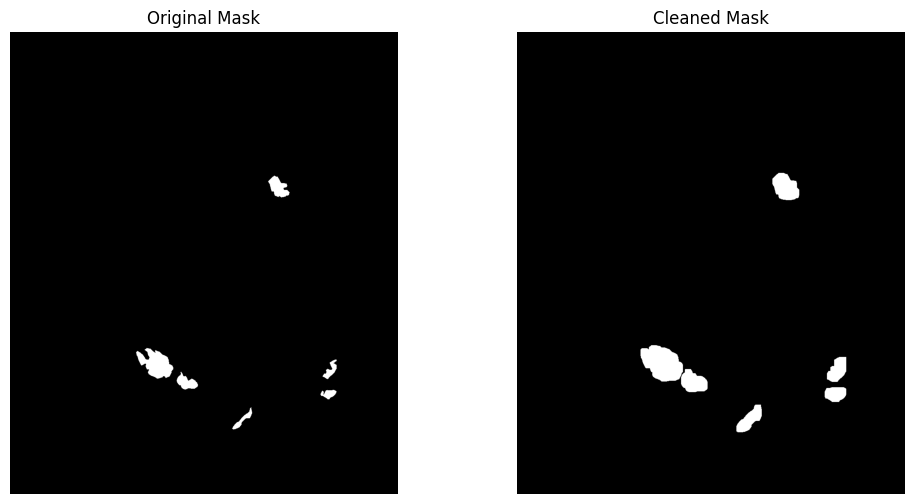

Extracted 18 centroid tiles.


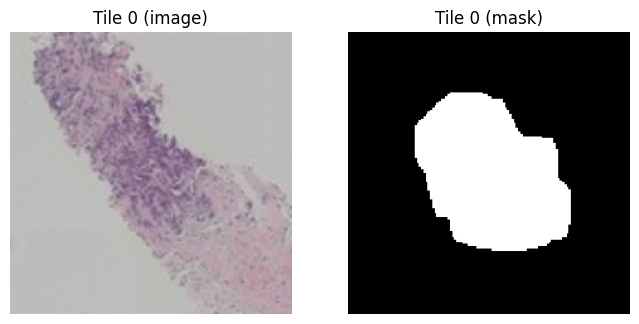

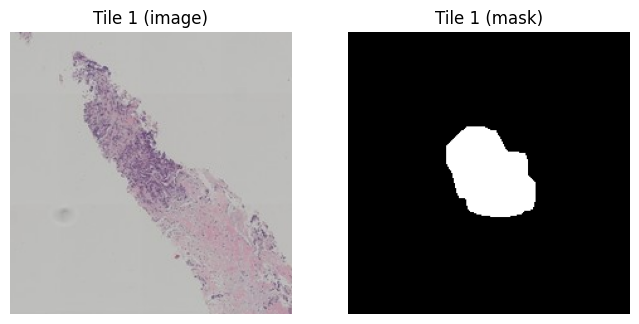

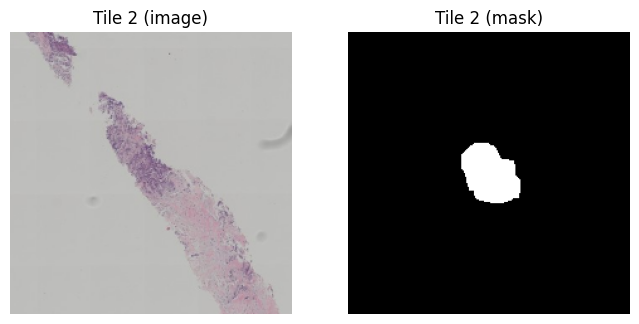

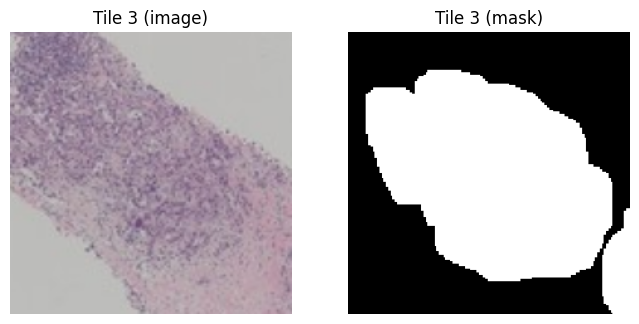


=== Testing on /gdrive/MyDrive/Artificial_Neural_Networks/Images_Classification_Challenge/dataset/train_data/img_0478.png ===


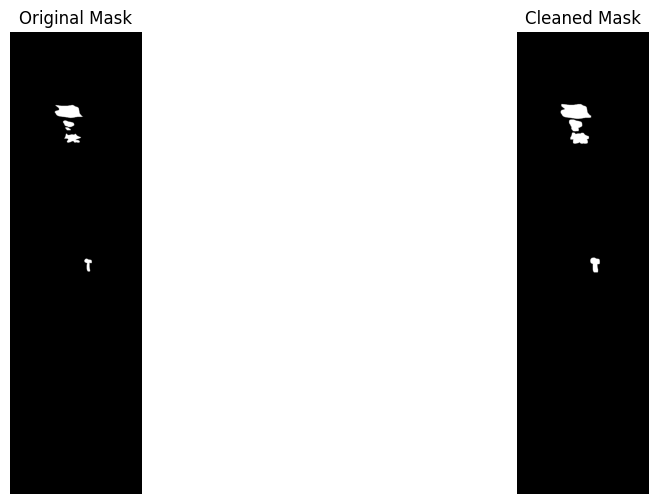

Extracted 12 centroid tiles.


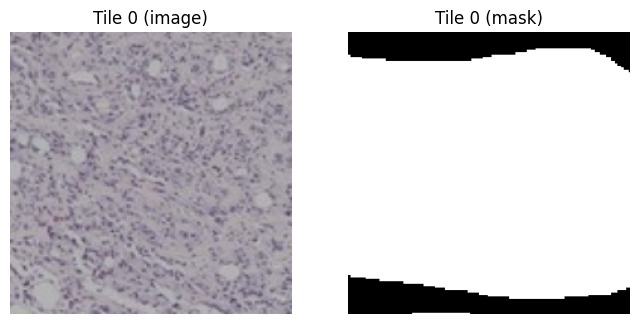

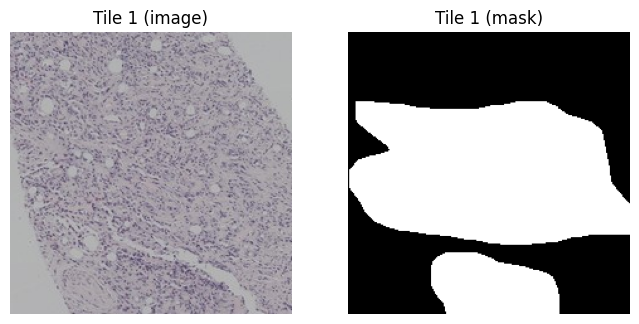

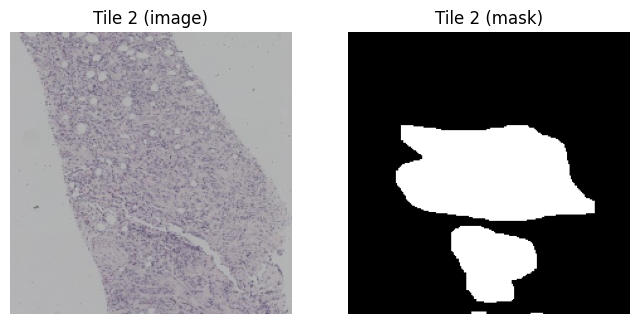

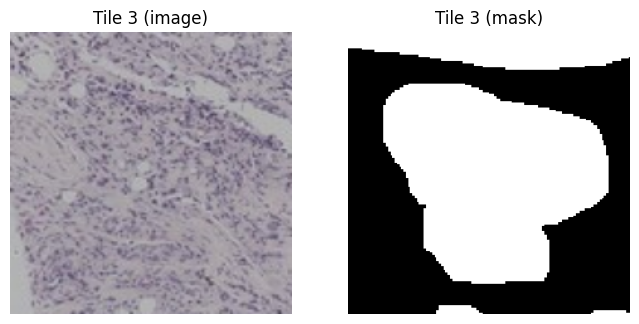

In [ ]:
    # Pick a few sample filenames
    sample_files = ["img_0175.png", "img_0233.png", "img_0334.png", "img_0385.png", "img_0478.png"]

    for fname in sample_files:
        img_path  = os.path.join(TRAIN_IMG_DIR, fname)
        mask_path = os.path.join(TRAIN_IMG_DIR, fname.replace("img_", "mask_"))

        if os.path.exists(img_path) and os.path.exists(mask_path):
            test_on_single_image(img_path, mask_path)
        else:
            print(f"Skipping {fname} because mask or image missing.")



##  **Previous tiles extraction**

In [ ]:
import os
import pandas as pd
import numpy as np
import cv2 # Required for color space conversion (LAB)
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms # You need this for the final output

# --- Define Constants (Aligning with your previous code) ---
#TRAIN_IMG_DIR = os.path.join(DATASET_PATH, "train_data") # Original directory for WSI patches and masks
#LABELS_CSV = os.path.join(DATASET_PATH, "train_labels.csv")


# ---------------------------------------------------------
#  LOADING FUNCTIONS
# ---------------------------------------------------------

def load_rgb(path):
    return Image.open(path).convert("RGB")

def load_mask(path):
    # Mask must be binary {0,255} or boolean convertible
    return Image.open(path).convert("L")


# ---------------------------------------------------------
#  MASK-BASED TUMOR DETECTION
# ---------------------------------------------------------

def mask_active(mask_arr, min_ratio=0.02):
    """
    Returns True if the percentage of active pixels in the mask
    exceeds min_ratio (e.g., 2% of the tile).
    """
    return (mask_arr > 0).mean() >= min_ratio


# ---------------------------------------------------------
#  TILE EXTRACTION
# ---------------------------------------------------------

def extract_masked_tiles(img, mask, tile_size=224, stride=168, min_mask_ratio=0.02):
    """
    Divides the image into tiles, keeps those with tumor tissue (via mask).
    """
    img_arr  = np.array(img)
    mask_arr = np.array(mask)

    H, W = img_arr.shape[:2] # Use image shape for dimensions
    tiles = []

    for y in range(0, H - tile_size + 1, int(stride)):
        for x in range(0, W - tile_size + 1, int(stride)):

            tile_mask = mask_arr[y:y+tile_size, x:x+tile_size]
            tile_img  = img_arr[y:y+tile_size, x:x+tile_size]


            # 1️⃣ Tile without tumor tissue (mask not active) → discarded
            if not mask_active(tile_mask, min_ratio=min_mask_ratio):
                continue

            tile = Image.fromarray(tile_img)

             # 3️⃣ Clean tumor tile → add to the list (both tile image and tile mask)
            tiles.append((tile, tile_mask))

    return tiles

def get_stride_for_label(label, tile_size):
    # Overlap more heavily for the least represented class ("Triple Negative")
    if label == 3: # Ensure case matches your label list
        return tile_size * 0.5  # 50% overlap (stride = 128 for tile_size=256)
    else:
        return tile_size * 0.8  # Less overlap (stride = 204.8 for tile_size=256)


In [ ]:
# ---------------------------------------------------------
#  DATASET CLASS
# ---------------------------------------------------------

class HistologyMaskedTiles(Dataset):
    """
    Dataset that performs on-the-fly tiling, filtering, and Macenko normalization.
    Tiles are generated ONCE here, normalized ONCE, then saved in memory.
    """
    def __init__(self, img_dir, labels_df, le, tile_size=256, transform=None,
                 min_mask_ratio=0.02):

        self.img_dir = img_dir
        self.labels_df = labels_df
        self.le = le
        self.tile_size = tile_size
        self.transform = transform
        self.min_mask_ratio = min_mask_ratio

        #self.macenko = MacenkoTransform()   # <--- added

        # Prepare list of (normalized_tile, label_encoded)
        self.samples = self._prepare_samples()

    def fallback_extract_tiles(self, img, mask, tile_size, stride, min_mask_ratio):

        for ratio in [
            min_mask_ratio * 0.75,
            min_mask_ratio * 0.5,
            min_mask_ratio * 0.25,
            min_mask_ratio * 0.125,
            0.02
        ]:
            tiles = extract_masked_tiles(
                img, mask,
                tile_size=tile_size,
                stride=stride,
                min_mask_ratio=ratio
            )

            if tiles:
                # Select tile with *max tumor mask ratio*
                best_tile, best_mask = max(
                    tiles,
                    key=lambda t: (t[1] > 0).mean()    # t[1] is mask tile
                )
                return [(best_tile, best_mask)], ratio

        return [], None

    def _prepare_samples(self):
        samples = []

        for _, row in self.labels_df.iterrows():

            img_name  = row["sample_index"]
            label_enc = row["label_encoded"]

            img_path  = os.path.join(self.img_dir, img_name)
            # Assuming masks are in the same folder as images:
            mask_path = img_path.replace("img_", "mask_")

            if not os.path.exists(mask_path):
                print(f"[WARNING] Mask not found for {img_path}")
                continue

            # Load WSI/patch & mask
            img  = load_rgb(img_path)
            mask = load_mask(mask_path)

            # Determine stride based on class label
            stride = get_stride_for_label(label_enc, self.tile_size)

            # Extract tumor tiles
            tiles = extract_masked_tiles(
                img, mask,
                tile_size=self.tile_size,
                stride=stride,
                min_mask_ratio=self.min_mask_ratio
            )

            # ------------------------
            #  CRITICAL CHECK: Ensure at least one tile was generated ---
            # ------------------------
            if not tiles:
                fallback_tiles, used_ratio = self.fallback_extract_tiles(
                    img, mask, self.tile_size, stride, self.min_mask_ratio
                )

                if not fallback_tiles:
                    print(f"[ERROR] No fallback possible for {img_name}")
                    continue

                print(f"[FALLBACK] Using fallback ratio {used_ratio} for {img_name}")

                # Apply Macenko + post-Macenko masking to fallback tile
                tile_pil, tile_mask = fallback_tiles[0]

                t_norm = tile_pil # !!! COMMMENTED self.macenko(tile_pil)

                #t_arr = np.array(t_norm)  # !!! COMMMENTED
                #t_arr = t_arr * (tile_mask[..., None] > 0) # !!! COMMMENTED  # post-Macenko masking
                #t_norm = Image.fromarray(t_arr) # !!! COMMMENTED

                samples.append((t_norm, label_enc))
                continue

            # ------------------------
            # NORMAL CASE: APPLY MACENKO TO EACH TILE
            # ------------------------
            for t, tile_mask in tiles:
                t_norm = t # !!! COMMMENTED self.macenko(t) # <-- MACENKO

               # t_arr = np.array(t_norm) # !!! COMMMENTED # <-- mask multiplication to set the non-tumor background pixels of an image tile to black
               # t_arr = t_arr * (tile_mask[..., None] > 0)# !!! COMMMENTED
               # t_norm = Image.fromarray(t_arr)# !!! COMMMENTED

                samples.append((t_norm, label_enc))

        # --- Final Logging ---
        print(f"Total tiles generated (Macenko-normalized): {len(samples)}")
        return samples

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_pil, label_encoded = self.samples[idx]

        if self.transform is not None:
            img_pil = self.transform(img_pil)

        return img_pil, label_encoded




##  **New tiles extraction**

In [ ]:
import os
import pandas as pd
import numpy as np
import cv2
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms


# ---------------------------------------------------------
#  LOADING FUNCTIONS
# ---------------------------------------------------------

def load_rgb(path):
    return Image.open(path).convert("RGB")

def load_mask(path):
    return Image.open(path).convert("L")


# ---------------------------------------------------------
#  MASK CLEANING (closing + dilation)
# ---------------------------------------------------------

def clean_mask(mask_arr, close_size=15, dilate_size=15):
    """
    Cleans the tumor mask via morphological closing + dilation,
    producing smoother, more contiguous regions suitable for centroid extraction.
    """
    kernel_close  = np.ones((close_size, close_size), np.uint8)
    kernel_dilate = np.ones((dilate_size, dilate_size), np.uint8)

    # Closing fills holes and connects nearby fragments
    mask_closed = cv2.morphologyEx(mask_arr, cv2.MORPH_CLOSE, kernel_close)

    # Dilation enlarges tumor regions slightly
    mask_dilated = cv2.dilate(mask_closed, kernel_dilate, iterations=1)

    return mask_dilated


# ---------------------------------------------------------
#  TILE EXTRACTION FROM CENTROIDS
# ---------------------------------------------------------

def extract_tiles_from_centroids(img, mask, tile_size=224, min_mask_ratio=0.02):
    """
    Extract tiles centered on connected components of the cleaned tumor mask.
    Produces significantly better tiles than sliding-window approaches.
    """
    img_arr  = np.array(img)
    mask_arr = np.array(mask)

    # Clean tumor regions
    mask_clean = clean_mask(mask_arr)

    # Connected components extraction
    num_labels, labels = cv2.connectedComponents((mask_clean > 0).astype(np.uint8))

    H, W = img_arr.shape[:2]
    tiles = []
    half = tile_size // 2

    for lbl in range(1, num_labels):  # skip background (label 0)
        ys, xs = np.where(labels == lbl)
        if len(xs) == 0:
            continue

        # Centroid of tumor region
        cx, cy = int(xs.mean()), int(ys.mean())

        # Tile boundaries (centered on tumor)
        x1, x2 = cx - half, cx + half
        y1, y2 = cy - half, cy + half

        # Padding if tile goes out of bounds
        pad_left   = max(0, -x1)
        pad_top    = max(0, -y1)
        pad_right  = max(0, x2 - W)
        pad_bottom = max(0, y2 - H)

        tile_img = img_arr[max(y1, 0):min(y2, H), max(x1, 0):min(x2, W)]
        tile_mask = mask_clean[max(y1, 0):min(y2, H), max(x1, 0):min(x2, W)]

        if pad_left or pad_top or pad_right or pad_bottom:
            tile_img = cv2.copyMakeBorder(tile_img, pad_top, pad_bottom, pad_left, pad_right, cv2.BORDER_CONSTANT, value=0)
            tile_mask = cv2.copyMakeBorder(tile_mask, pad_top, pad_bottom, pad_left, pad_right, cv2.BORDER_CONSTANT, value=0)

        # Reject tiles with insufficient tumor content
        if (tile_mask > 0).mean() < min_mask_ratio:
            continue

        tiles.append((Image.fromarray(tile_img), tile_mask))

    return tiles


# ---------------------------------------------------------
#  OPTIONAL FALLBACK: SLIDING WINDOW (for safety)
# ---------------------------------------------------------

def fallback_sliding_window(img, mask, tile_size=224, min_mask_ratio=0.01):
    """
    A light fallback in case centroid-based extraction produces no tiles.
    """
    img_arr  = np.array(img)
    mask_arr = np.array(mask)

    H, W = img_arr.shape[:2]
    tiles = []

    stride = tile_size // 2  # 50% overlap

    for y in range(0, H - tile_size + 1, stride):
        for x in range(0, W - tile_size + 1, stride):

            tile_mask = mask_arr[y:y+tile_size, x:x+tile_size]
            if (tile_mask > 0).mean() < min_mask_ratio:
                continue

            tile_img = img_arr[y:y+tile_size, x:x+tile_size]
            tiles.append((Image.fromarray(tile_img), tile_mask))

    return tiles

In [ ]:
def extract_centered_crop(img_arr, cx, cy, crop_size):
    """
    Extract a square crop centered at (cx, cy) with padding if needed.
    """
    H, W = img_arr.shape[:2]
    half = crop_size // 2

    x1, x2 = cx - half, cx + half
    y1, y2 = cy - half, cy + half

    pad_left   = max(0, -x1)
    pad_top    = max(0, -y1)
    pad_right  = max(0, x2 - W)
    pad_bottom = max(0, y2 - H)

    crop = img_arr[max(y1, 0):min(y2, H),
                   max(x1, 0):min(x2, W)]

    if pad_left or pad_top or pad_right or pad_bottom:
        crop = cv2.copyMakeBorder(
            crop,
            pad_top, pad_bottom, pad_left, pad_right,
            cv2.BORDER_CONSTANT,
            value=0
        )

    return crop

def extract_multiscale_tiles_from_centroids(
    img,
    mask,
    tile_size=224,
    min_mask_ratio=0.02,
    zoom_factors=(0.5, 1.0, 2.0)  # zoom-in, base, zoom-out
):
    """
    Extract multiscale tiles (zoom-in / base / zoom-out) centered on tumor regions.
    All outputs are resized to tile_size x tile_size.
    """
    img_arr  = np.array(img)
    mask_arr = np.array(mask)

    mask_clean = clean_mask(mask_arr)
    num_labels, labels = cv2.connectedComponents((mask_clean > 0).astype(np.uint8))

    H, W = img_arr.shape[:2]
    tiles = []

    for lbl in range(1, num_labels):
        ys, xs = np.where(labels == lbl)
        if len(xs) == 0:
            continue

        cx, cy = int(xs.mean()), int(ys.mean())

        for zf in zoom_factors:
            crop_size = int(tile_size * zf)

            # extract image + mask crop
            crop_img  = extract_centered_crop(img_arr,  cx, cy, crop_size)
            crop_mask = extract_centered_crop(mask_clean, cx, cy, crop_size)

            # resize to 224x224
            crop_img  = cv2.resize(crop_img,  (tile_size, tile_size), interpolation=cv2.INTER_LINEAR)
            crop_mask = cv2.resize(crop_mask, (tile_size, tile_size), interpolation=cv2.INTER_NEAREST)

            # tumor content check (on resized mask)
            if (crop_mask > 0).mean() < min_mask_ratio:
                continue

            tiles.append((Image.fromarray(crop_img), crop_mask))

    return tiles


In [ ]:
class HistologyMaskedTiles(Dataset):
    """
    Dataset that extracts tumor-centered tiles using centroid-based extraction.
    Sliding-window is used *only* as a minimal fallback.
    """
    def __init__(self, img_dir, labels_df, le, tile_size=224, transform=None,
                 min_mask_ratio=0.02):

        self.img_dir = img_dir
        self.labels_df = labels_df
        self.le = le
        self.tile_size = tile_size
        self.transform = transform
        self.min_mask_ratio = min_mask_ratio

        #self.macenko = MacenkoTransform()

        # Cache tiles
        self.samples = self._prepare_samples()

    # -----------------------------------------------------

    def _prepare_samples(self):
        samples = []

        for _, row in self.labels_df.iterrows():

            img_name  = row["sample_index"]
            label_enc = row["label_encoded"]

            img_path  = os.path.join(self.img_dir, img_name)
            mask_path = img_path.replace("img_", "mask_")

            if not os.path.exists(mask_path):
                print(f"[WARNING] Mask not found for {img_name}")
                continue

            img  = load_rgb(img_path)
            mask = load_mask(mask_path)

            # EXTRACT TILES USING CENTROIDS
            # tiles = extract_tiles_from_centroids(
            #     img, mask,
            #     tile_size=self.tile_size,
            #     min_mask_ratio=self.min_mask_ratio
            # )

            # MULTISCALE TILES EXTRACTION !!!!!!
            tiles = extract_multiscale_tiles_from_centroids(
                img,
                mask,
                tile_size=self.tile_size,
                min_mask_ratio=self.min_mask_ratio,
                zoom_factors=(0.5, 1.0, 2.0)
            )


            # FALLBACK (only if no centroid tiles)
            if not tiles:
                print(f"[FALLBACK] No centroid tiles for {img_name}, using sliding window")
                tiles = fallback_sliding_window(
                    img, mask,
                    tile_size=self.tile_size,
                    min_mask_ratio=self.min_mask_ratio * 0.2
                )

                if not tiles:
                    print(f"[ERROR] No tiles found for {img_name}")
                    continue

            # Store tiles
            for t, t_mask in tiles:
                t_norm = t # self.macenko(t)
                samples.append((t_norm, label_enc))

        print(f"Total tiles extracted: {len(samples)}")
        return samples

    # -----------------------------------------------------

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_pil, label_encoded = self.samples[idx]

        if self.transform is not None:
            img_pil = self.transform(img_pil)

        return img_pil, label_encoded

In [ ]:
from torchvision import transforms
from sklearn.preprocessing import LabelEncoder

# Load the labels file
labels_df = pd.read_csv(LABELS_CSV)

# The classes are string labels (e.g., 'HER2(+)', 'Luminal B'). We need to map them to integers.
# This also ensures we get the ordered list of class names.
le = LabelEncoder()
labels_df['label_encoded'] = le.fit_transform(labels_df['label']) ## TODO: IS ONE-HOT-ENC BETTER?


dataset = HistologyMaskedTiles(
    img_dir=TRAIN_IMG_DIR,
    labels_df=labels_df, # Pass the DataFrame directly
    le=le,
    tile_size=224,
    transform=None,
    min_mask_ratio=0.1,
)


KeyboardInterrupt: 



##  **Plot tiles**

In [ ]:
labels = [label for _, label in dataset.samples]
tiles = [tile for tile, _ in dataset.samples]
print(tiles[:10])

[<PIL.Image.Image image mode=RGB size=128x128 at 0x7FE479BFD130>, <PIL.Image.Image image mode=RGB size=128x128 at 0x7FE491FC0CB0>, <PIL.Image.Image image mode=RGB size=128x128 at 0x7FE491EDED20>, <PIL.Image.Image image mode=RGB size=128x128 at 0x7FE479B754F0>, <PIL.Image.Image image mode=RGB size=128x128 at 0x7FE476377B00>, <PIL.Image.Image image mode=RGB size=128x128 at 0x7FE4764C3B60>, <PIL.Image.Image image mode=RGB size=128x128 at 0x7FE4764C0440>, <PIL.Image.Image image mode=RGB size=128x128 at 0x7FE475DB66C0>, <PIL.Image.Image image mode=RGB size=128x128 at 0x7FE475DB78F0>, <PIL.Image.Image image mode=RGB size=128x128 at 0x7FE491C70A70>]


Numero totale di tiles estratti: 2876

Distribuzione delle classi:
3: 292
2: 1004
1: 776
0: 804


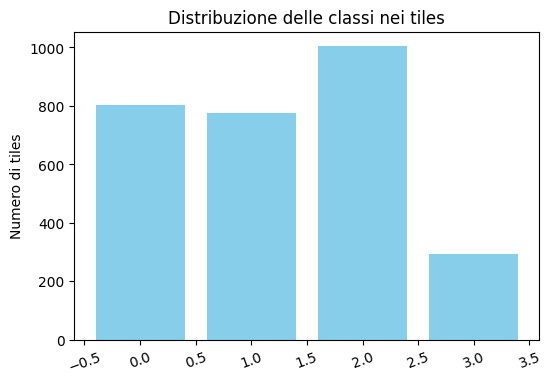

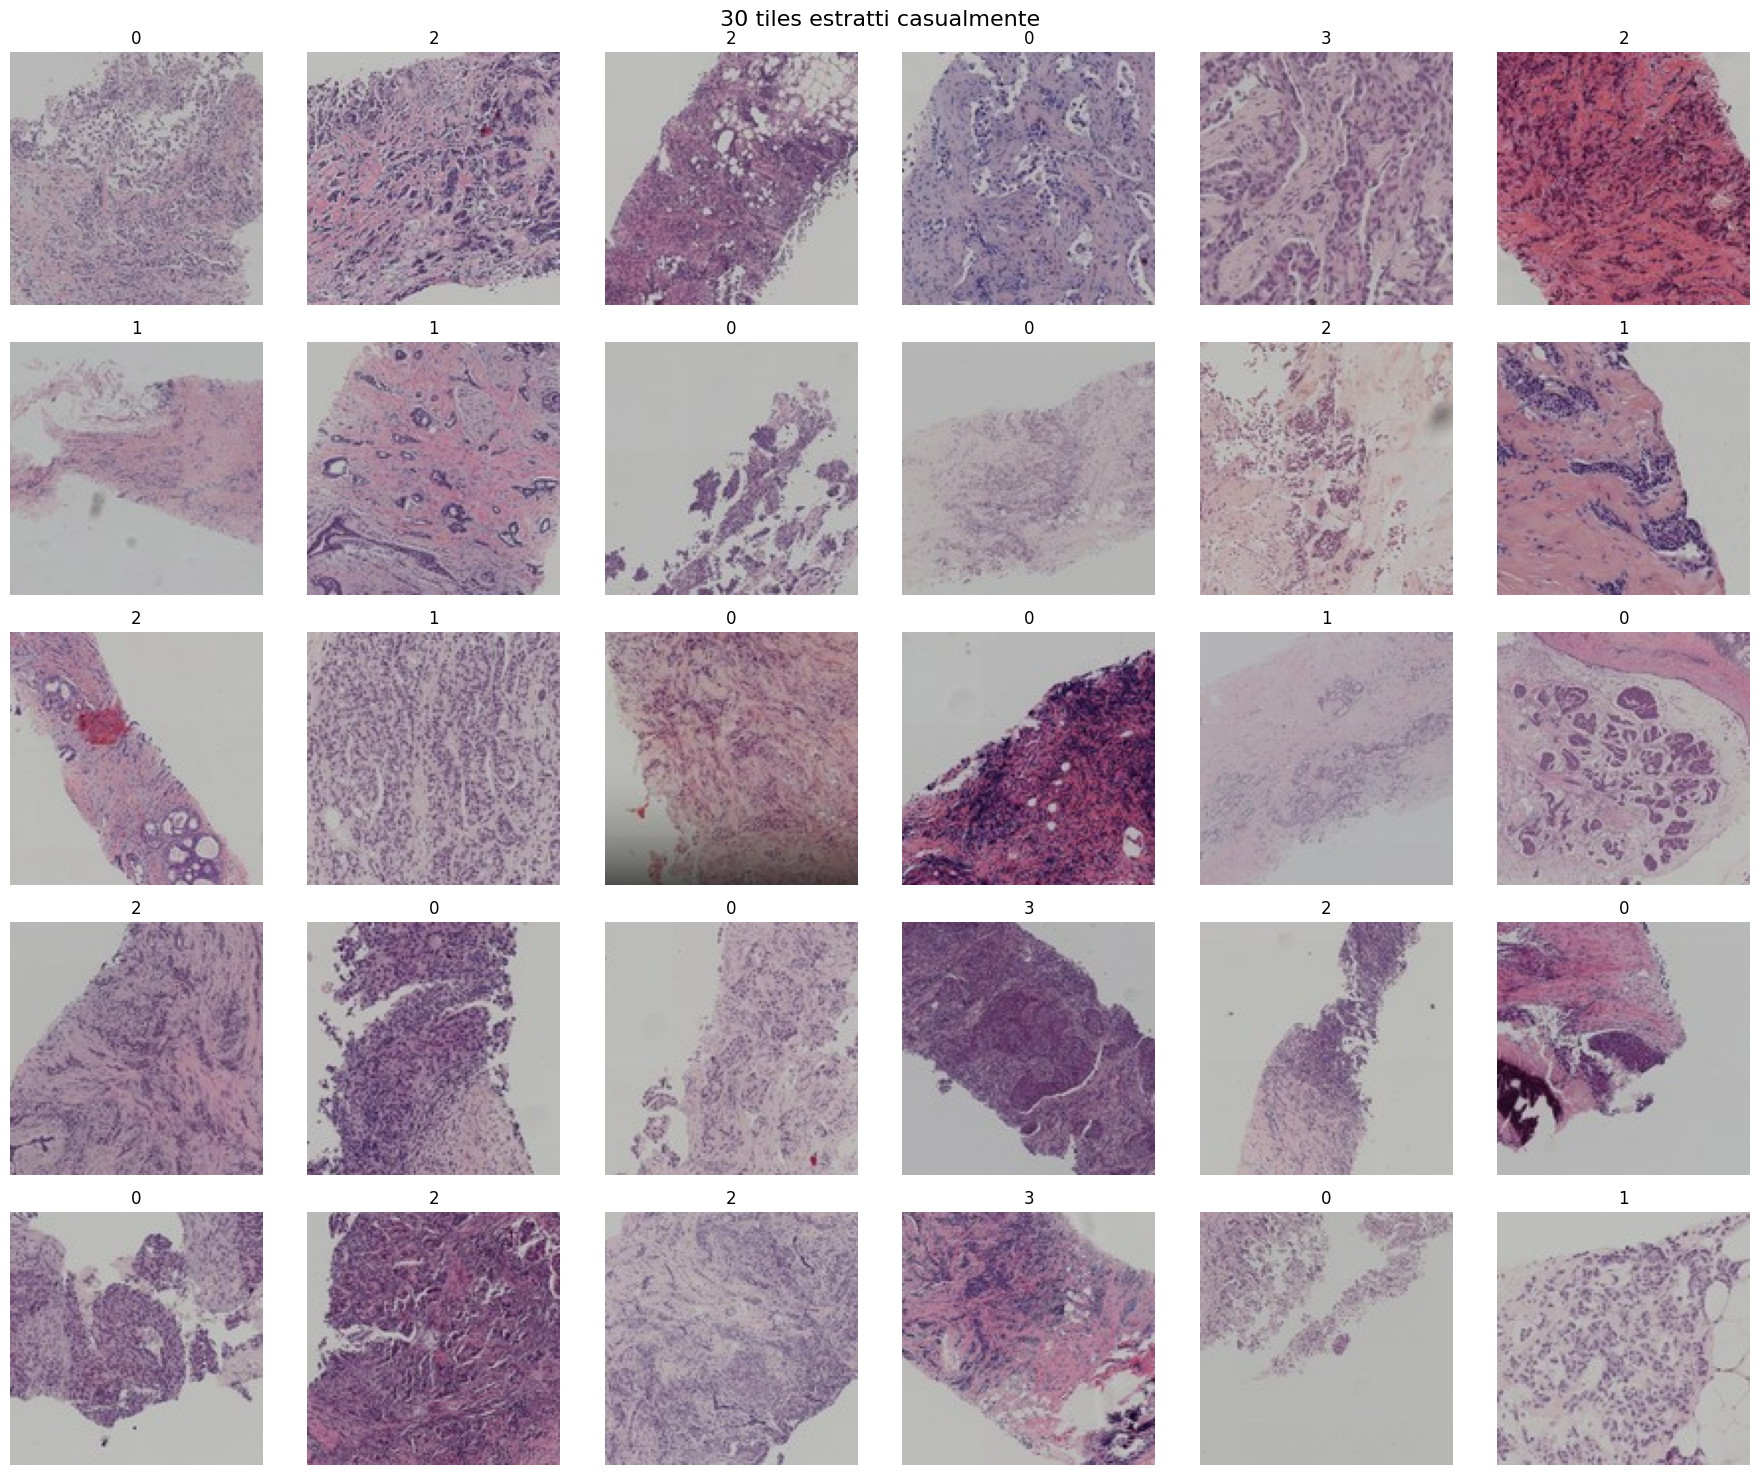

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import random
import math

print(f"Numero totale di tiles estratti: {len(dataset)}")


# ---------------------------------------------------------
# DISTRIBUZIONE DELLE LABELS
# ---------------------------------------------------------

labels = [label for _, label in dataset.samples]
label_counts = Counter(labels)

print("\nDistribuzione delle classi:")
for cls, count in label_counts.items():
    print(f"{cls}: {count}")

# Bar plot
plt.figure(figsize=(6,4))
plt.bar(label_counts.keys(), label_counts.values(), color="skyblue")
plt.title("Distribuzione delle classi nei tiles")
plt.ylabel("Numero di tiles")
plt.xticks(rotation=20)
plt.show()


# ---------------------------------------------------------
# STAMPA DI ALCUNE IMMAGINI DEL DATASET
# ---------------------------------------------------------

def show_random_tiles(dataset, n=30):
    idxs = random.sample(range(len(dataset)), n)

    # Calcola layout dinamico (quadrato o quasi)
    cols = int(math.ceil(math.sqrt(n)))
    rows = int(math.ceil(n / cols))

    plt.figure(figsize=(cols * 3, rows * 3))

    for i, idx in enumerate(idxs):
        img, label = dataset[idx]

        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.title(str(label))
        plt.axis("off")

    plt.suptitle(f"{n} tiles estratti casualmente", fontsize=16)
    plt.tight_layout()
    plt.show()

show_random_tiles(dataset, n=30)

In [ ]:
img, label = dataset.samples[0]
img_arr = np.array(img)

print("shape:", img_arr.shape)
print("min/max:", img_arr.min(), img_arr.max())
print("unique values:", len(np.unique(img_arr)))


shape: (224, 224, 3)
min/max: 68 211
unique values: 137




##  **Macenko normalization (Not finished, skip)**

In [ ]:
import numpy as np
from PIL import Image
from scipy.linalg import lstsq

def rgb2od(I, Io=240):
    I = I.astype(np.float32)
    I[I == 0] = 1
    return -np.log(I / Io)

def od2rgb(OD, Io=240):
    OD = np.clip(OD, 0, 3)  # evita estremi
    I = Io * np.exp(-OD)
    return np.clip(I, 0, 255).astype(np.uint8)


class MacenkoNormalizer:
    def __init__(self, Io=240, alpha=1, beta=0.15, percentile=99):
        self.Io = Io
        self.alpha = alpha      # percentile angoli
        self.beta = beta        # soglia OD per background
        self.perc = percentile  # percentile per scaling
        self.HE_ref = None
        self.C_ref = None

    # --------- stima matrice di stain su UNA immagine ----------
    def _get_stain_matrix(self, I):
        OD = rgb2od(I, self.Io).reshape(-1, 3)

        # rimozione background: teniamo solo pixel con OD sufficientemente alti in TUTTI i canali
        ODhat = OD[np.all(OD > self.beta, axis=1)]
        if ODhat.size == 0:
            raise ValueError("ODhat vuoto: immagine troppo chiara / senza tessuto.")

        # autovettori della covarianza (Macenko)
        _, V = np.linalg.eigh(np.cov(ODhat.T))  # V: 3x3, colonne = autovettori
        V = V[:, [2, 1]]  # prendiamo i due principali (ord. crescente degli autovalori)

        # proiezione sul piano H&E
        That = ODhat @ V
        phi = np.arctan2(That[:, 1], That[:, 0])

        minPhi, maxPhi = np.percentile(phi, [self.alpha, 100 - self.alpha])

        v1 = V @ np.array([np.cos(minPhi), np.sin(minPhi)])
        v2 = V @ np.array([np.cos(maxPhi), np.sin(maxPhi)])

        # normalizza
        H = v1 / np.linalg.norm(v1)
        E = v2 / np.linalg.norm(v2)

        HE = np.stack([H, E], axis=1)  # 3x2
        return HE

    # ----------------- FIT su un insieme di tiles -----------------
    def fit(self, reference_images):
        """
        reference_images: lista di immagini PIL (tiles tumorali)
        """
        # 1) stima HE per ciascun tile e fai la mediana (robusto)
        HE_list = []
        C_list = []

        for img in reference_images:
            I = np.array(img).astype(np.uint8)
            HE = self._get_stain_matrix(I)      # 3x2
            OD = rgb2od(I, self.Io).reshape(-1, 3)
            C, _, _, _ = lstsq(HE, OD.T)        # 2 x N
            HE_list.append(HE)
            C_list.append(C)

        HE_stack = np.stack(HE_list, axis=2)        # 3 x 2 x T
        self.HE_ref = np.median(HE_stack, axis=2)   # 3 x 2

        # 2) percentili concentrazione globali
        C_all = np.concatenate(C_list, axis=1)      # 2 x (N_tot)
        self.C_ref = np.percentile(C_all, self.perc, axis=1)

        print("✔ Macenko fit completato.")
        print("Stain matrix HE_ref:\n", self.HE_ref)
        print("Percentili concentrazione:", self.C_ref)

    # ----------------- TRANSFORM di un singolo tile -----------------
    def transform(self, img):
        if self.HE_ref is None:
            raise ValueError("Devi chiamare fit() prima di transform().")

        I = np.array(img).astype(np.uint8)
        h, w, _ = I.shape

        OD = rgb2od(I, self.Io).reshape(-1, 3)

        # stima concentrazioni nel basis HE_ref
        C, _, _, _ = lstsq(self.HE_ref, OD.T)   # 2 x N

        # scala ai percentili di riferimento
        C_tile_perc = np.percentile(C, self.perc, axis=1)
        scale = self.C_ref / (C_tile_perc + 1e-8)
        C2 = C * scale[:, None]

        OD_norm = (self.HE_ref @ C2).T.reshape(h, w, 3)
        I_norm = od2rgb(OD_norm, self.Io)

        return Image.fromarray(I_norm)

In [ ]:
random.shuffle(dataset.samples)
reference_tiles = []
for i in range(100):
    reference_tiles.append(dataset[i][0])   # dataset da training

In [ ]:
normalizer = MacenkoNormalizerPro()
normalizer.fit(reference_tiles)

✔ Macenko fit completato.
Stain matrix HE:
 [[0.50835425 0.5107458 ]
 [0.7038951  0.6998051 ]
 [0.49609253 0.49941123]]
Percentili concentrazione: [34.775066 21.052168]


In [ ]:
normalized_samples = []

for img, label in dataset.samples:
    img_norm = normalizer.transform(img)
    normalized_samples.append((img_norm, label))


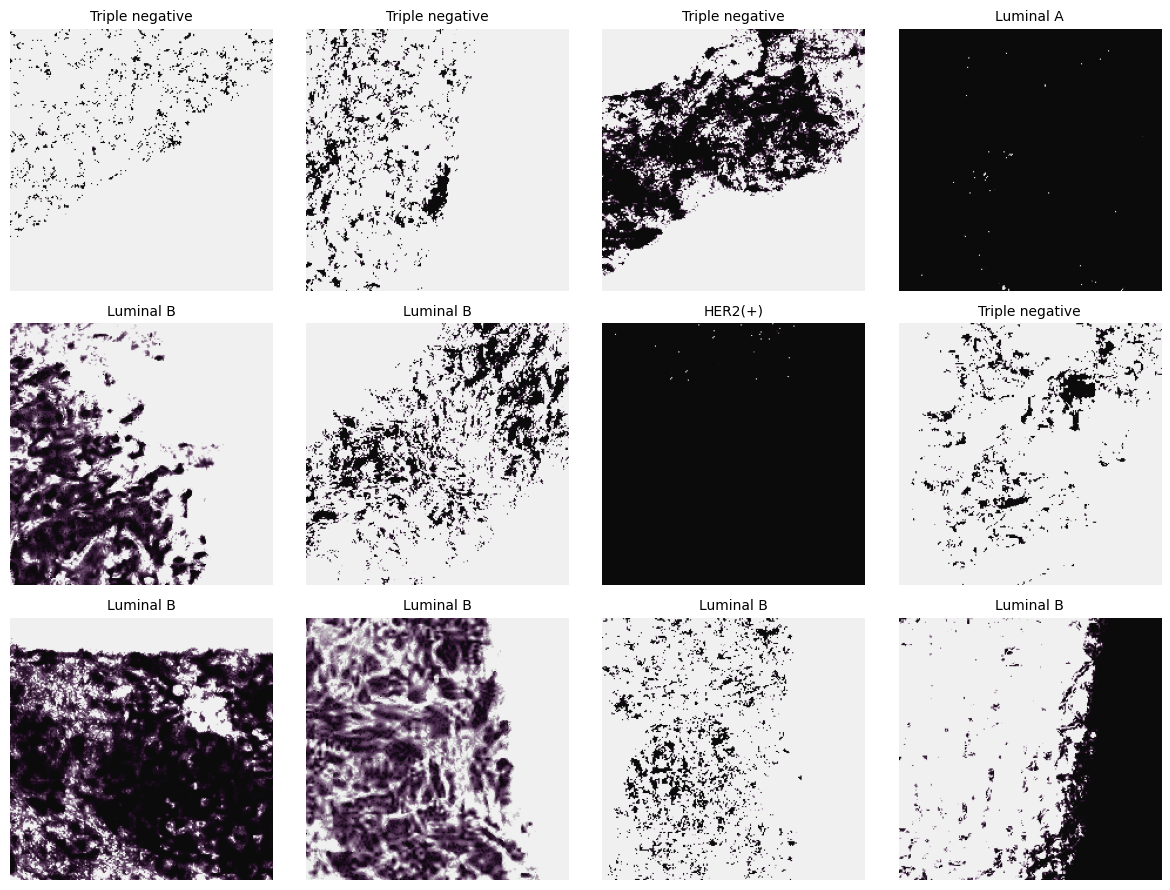

In [ ]:
import matplotlib.pyplot as plt
import math

def show_tiles(samples, n=10, cols=5, tile_size=3):
    """
    Visualizza n tiles dalla lista normalized_samples.

    parameters:
    - samples: lista (img, label)
    - n: numero di tile da mostrare
    - cols: numero di colonne nella griglia
    - tile_size: scala delle dimensioni del singolo tile (in pollici)
    """

    # numero di righe richieste
    rows = math.ceil(n / cols)

    # figura con dimensione variabile
    plt.figure(figsize=(cols * tile_size, rows * tile_size))

    for i in range(n):
        img, label = samples[i]
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.title(f"{label}", fontsize=10)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

show_tiles(normalized_samples, n=12, cols=4, tile_size=3)


In [ ]:
import numpy as np

import numpy as np

def macenko_normalize(img, H_ref, Io=240, alpha=1, beta=0.15):
    """
    Macenko stain normalization using a precomputed reference matrix (H_ref).
    img: RGB numpy array (H,W,3)
    H_ref: reference stain matrix (3x2)
    """
    # --- Convert to optical density ---
    img = img.astype(np.float32) + 1
    OD = -np.log(img / Io)

    # --- Remove low OD pixels (background) ---
    ODhat = OD.reshape((-1, 3))
    ODhat = ODhat[~np.any(ODhat < beta, axis=1)]

    # --- SVD to obtain stain vectors ---
    _, _, V = np.linalg.svd(ODhat, full_matrices=False)
    H = V[:2].T        # 3×2 matrix

    # --- FIX 1: normalize stain vector orientation ---
    # Hematoxylin should have strong blue/purple → ensure H[:,0] direction is consistent
    if H[0, 0] < 0:
        H[:, 0] *= -1
    if H[1, 1] < 0:
        H[:, 1] *= -1

    # --- Project OD on stain matrix (correct formula!) ---
    C = np.dot(OD.reshape((-1, 3)), np.linalg.pinv(H.T)) # Corrected: Changed H to H.T here

    # --- Reconstruct normalized OD using reference stain matrix ---
    OD_norm = np.dot(C, H_ref.T)

    # --- Convert back to RGB ---
    img_norm = Io * np.exp(-OD_norm)
    img_norm = img_norm.reshape(img.shape)
    img_norm = np.clip(img_norm, 0, 255).astype(np.uint8)

    return img_norm


class MacenkoNormalizeTransform:
    def __init__(self, H_ref):
        self.H_ref = H_ref

    def __call__(self, img_pil):
        img_np = np.array(img_pil)
        img_norm = macenko_normalize(img_np, self.H_ref)
        return Image.fromarray(img_norm)

def compute_reference_macenko(tile_list, Io=240, beta=0.15):
    """
    tile_list: list of PIL images
    Returns: stain reference matrix H_ref (3x2)
    """
    OD_all = []

    for pil in tile_list:
        img = np.array(pil).astype(np.float32) + 1
        OD = -np.log(img / Io)
        OD = OD.reshape((-1, 3))
        OD = OD[~np.any(OD < beta, axis=1)]
        OD_all.append(OD)

    OD_all = np.concatenate(OD_all, axis=0)

    # SVD
    _, _, V = np.linalg.svd(OD_all, full_matrices=False)
    H_ref = V[:2].T  # 3x2 matrix

    return H_ref


In [ ]:
# ---- COMPUTE MACENKO REFERENCE MATRIX BEFORE SPLIT ----
import random
SEED=42
random.seed(SEED)

N_REF_TILES = int(len(dataset)*0.2)   # usa 300–600 tiles; è più che sufficiente
subset = random.sample(dataset.samples, N_REF_TILES)

reference_tiles = [pil for pil, _ in subset]

print("Computing Macenko reference matrix...")
H_ref = compute_reference_macenko(reference_tiles)

print("Reference matrix computed:")
print(H_ref)


Computing Macenko reference matrix...
Reference matrix computed:
[[-0.52022994 -0.60444003]
 [-0.67349595  0.7247579 ]
 [-0.52513236 -0.3307237 ]]


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random

# Fix H_ref shape if needed (GUARDA QUI: LA VERSIONE CORRETTA)
if H_ref.shape == (2, 3):
    H_ref = H_ref.T
elif H_ref.shape != (3, 2):
    raise ValueError(f"H_ref must be (3,2). Got {H_ref.shape}")

# Now create final reference matrix to be used everywhere
H_REF = H_ref.astype(np.float32)




def show_original_vs_macenko(dataset, H_ref, n=5):
    plt.figure(figsize=(12, 6))

    for i in range(n):
        idx = random.randint(0, len(dataset)-1)
        img_pil, label = dataset[idx]

        img_np = np.array(img_pil)
        mac_img_np = macenko_normalize(img_np, H_ref)
        mac_img_pil = Image.fromarray(mac_img_np)

        # original
        plt.subplot(2, n, i+1)
        plt.imshow(img_pil)
        plt.title(f"Original\nLabel: {label}")
        plt.axis("off")

        # macenko
        plt.subplot(2, n, n + i + 1)
        plt.imshow(mac_img_pil)
        plt.title("Macenko normalized")
        plt.axis("off")

    plt.tight_layout()
    plt.show()
show_original_vs_macenko(dataset, H_REF, n=5)




##  **Plot macenko tiles**

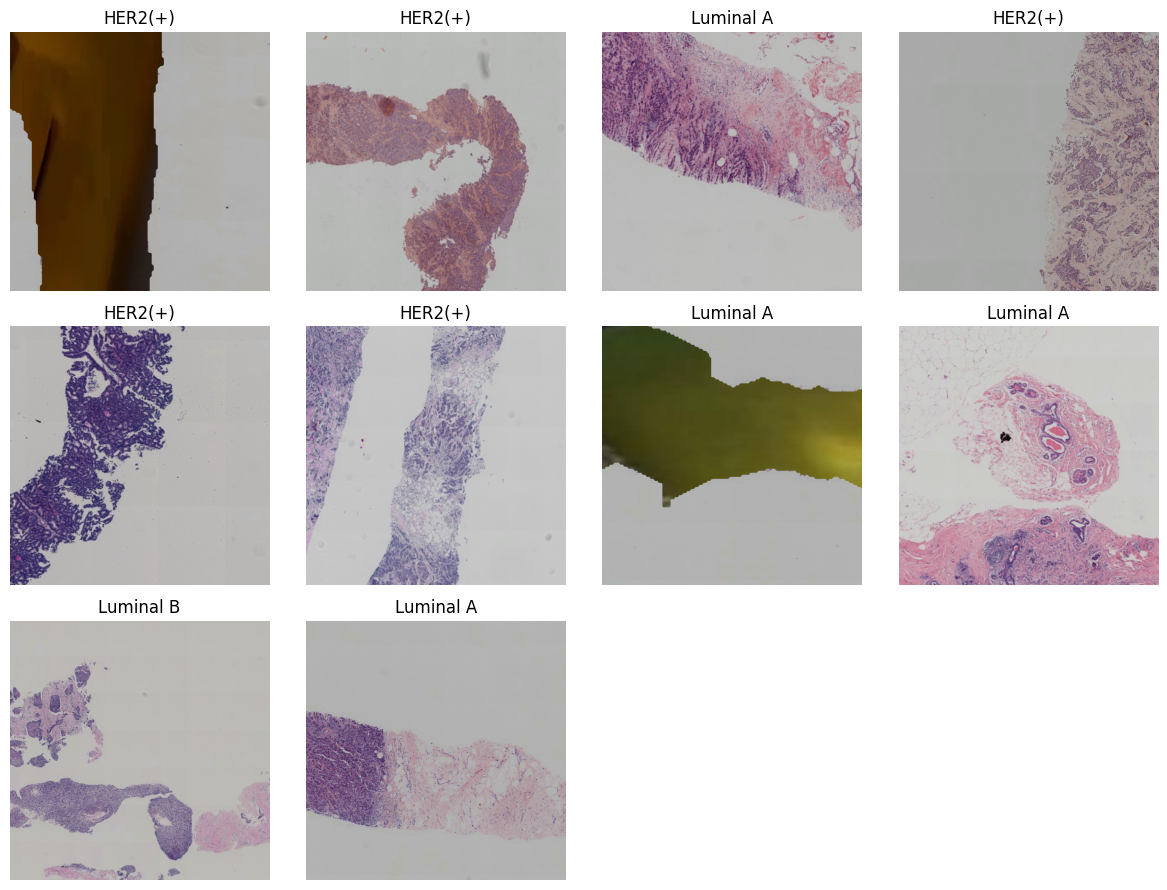

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math
import torch

def show_dataset_samples(dataset, n=200):
    # Ensure n does not exceed the dataset size
    n = min(n, len(dataset))
    idxs = random.sample(range(len(dataset)), n)

    # Calculate grid size dynamically
    cols = int(math.ceil(math.sqrt(n))) # Approximate a square-ish grid
    rows = int(math.ceil(n / cols))

    plt.figure(figsize=(cols * 3, rows * 3)) # Adjust figure size dynamically

    for i, idx in enumerate(idxs):
        img, label = dataset[idx]

        # converti tensor in immagine numpy
        if isinstance(img, torch.Tensor):
            img_np = img.permute(1, 2, 0).numpy()
            img_np = np.clip(img_np, 0, 1)   # per evitare valori fuori range
        else:
            img_np = np.array(img)

        plt.subplot(rows, cols, i+1)
        plt.imshow(img_np)
        plt.title(str(label))
        plt.axis("off")

    plt.tight_layout()
    plt.show()


show_dataset_samples(dataset, n=10)

In [ ]:
for i in range(len(dataset)):
    img, label = dataset[i+100]
    print(np.array(img).shape, label)
    if i==10:
      break


(512, 512, 3) HER2(+)
(512, 512, 3) HER2(+)
(512, 512, 3) HER2(+)
(512, 512, 3) HER2(+)
(512, 512, 3) HER2(+)
(512, 512, 3) HER2(+)
(512, 512, 3) HER2(+)
(512, 512, 3) HER2(+)
(512, 512, 3) HER2(+)
(512, 512, 3) HER2(+)
(512, 512, 3) HER2(+)
